In [44]:
from regime_module import *
from statsmodels.iolib.summary2 import summary_col
import csv
import os
import matplotlib.backends.backend_pdf

cur_wd = os.getcwd()
print(cur_wd)
image_wd = os.path.join(cur_wd, 'backtest_images_market_timing')
backtest_wd = os.path.join(cur_wd, 'backtests_market_timing')
import matplotlib.pyplot as plt
from scipy import stats



from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np


D:\janko_machine_learning\playground


In [45]:
def write_outputs(bt, ff_factors_compare, umd, q_factor, returns, lookback_backtest, feature_set, binary_returns, backtest_write, image_write, cur_wd, data_type ):
    
    backtest_dict = {}
    
    outname = 'output_results_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    outnamelatex = 'output_results_latex_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    
    outname_scaled = 'output_results_scaled_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    outnamelatex_scaled = 'output_results_latex_scaled_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    
    
    output_reg = []
    output_capm = []
    output_umd = []
    output_qfactor = []
    output_tm = []
    output_hm = []
    
    output_reg_scaled = []
    output_capm_scaled = []
    output_umd_scaled = []
    output_qfactor_scaled = []
    output_tm_scaled = []
    output_hm_scaled = []
    
    #names = ['Logistic L/S', 'Logistic L', 'Logistic S', 'KNN L/S', 'KNN L', 'KNN S', 'Neural Net L/S', 'Neural Net L', 'Neural Net S', 'RF L/S', 'RF L', 'RF S','AdaBoost L/S', 'AdaBoost L', 'AdaBoost S', 'Ensemble', 'Binary']

    names = ['KNN L/S', 'KNN L', 'KNN S', 'Neural Net L/S', 'Neural Net L', 'Neural Net S', 'RF L/S', 'RF L', 'RF S','AdaBoost L/S', 'AdaBoost L', 'AdaBoost S', 'Ensemble', 'Binary']
    """
    
    
    print("Logistic")
    print("Long and Short")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Logistic"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'both')
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_Logistic_' + 'ls' + '.pdf'))


    print("Long Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Logistic"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'long')
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_' + 'l' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_scaled_' + 'l' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_Logistic_' + 'l' + '.pdf'))


    print("Short Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Logistic"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'short')
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_' + 's' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_Logistic_scaled_' + 's' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_Logistic_' + 's' + '.pdf'))
    
    """
    
    
    
    print("KNN")
    print("Long and Short")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Nearest Neighbors"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'both')
    backtest_dict['KNN_LS'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_KNN_' + 'ls' + '.pdf'))

    

    print("Long Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Nearest Neighbors"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'long')
    backtest_dict['KNN_L'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_' + 'l' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_scaled_' + 'l' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_KNN_' + 'l' + '.pdf'))


    print("Short Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Nearest Neighbors"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'short')
    backtest_dict['KNN_S'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_' + 's' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_KNN_scaled_' + 's' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_KNN_' + 's' + '.pdf'))


    print("Neural Net")
    print("Long and Short")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Neural Net"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'both')
    backtest_dict['NN_LS'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_NN_' + 'ls' + '.pdf'))


    print("Long Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Neural Net"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'long')
    backtest_dict['KNN_L'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_' + 'l' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_scaled_' + 'l' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_NN_' + 'l' + '.pdf'))

    print("Short Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns,lookback_backtest, input_classifiers= ["Neural Net"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'short')
    backtest_dict['KNN_S'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_' + 's' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_NN_scaled_' + 's' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_NN_' + 's' + '.pdf'))


    print("Random Forest")
    print("Long and Short")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Random Forest"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'both')
    backtest_dict['RF_LS'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_RF_' + 'ls' + '.pdf'))


    print("Long Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Random Forest"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'long')
    backtest_dict['RF_L'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_' + 'l' + '.csv'))
    backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_scaled_' + 'l' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_RF_' + 'l' + '.pdf'))


    print("Short Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Random Forest"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'short')
    backtest_dict['RF_S'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_' + 's' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_RF_scaled' + 's' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_RF_' + 's' + '.pdf'))

        
        
    print("AdaBooost")
    print("Long and Short")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["AdaBoost"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'both')
    backtest_dict['AdaBoost_LS'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_AdaBoost_' + 'ls' + '.pdf'))


    print("Long Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["AdaBoost"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'long')
    backtest_dict['AdaBoost_L'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_' + 'l' + '.csv'))
    backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_scaled_' + 'l' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_AdaBoost_' + 'l' + '.pdf'))


    print("Short Only")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["AdaBoost"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no', trade_type = 'short')
    backtest_dict['AdaBoost_S'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_' + 's' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_AdaBoost_scaled' + 's' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_AdaBoost_' + 's' + '.pdf'))


    print("Ensemble System")
    backtest, weights, scaled_backtest = bt.run_backtest(returns, lookback_backtest, input_classifiers= ["Voter"], inputs = feature_set, outputs = binary_returns,  ensemble = 'no')  
    backtest_dict['Ensemble'] = backtest.copy()
    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)

    backtest.to_csv(os.path.join(backtest_write, data_type + '_ensemble_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_ensemble_scaled_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_ensemble_' + 'ls' + '.pdf'))


    print("Simple Binary Decision")
    scaled_backtest = returns.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')
    weights = returns.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')
    backtest.values[:] = 0
    scaled_backtest.values[:] = 0
    weights.values[:] = 0
    signal = returns.rolling(lookback_backtest).mean().shift(1).dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')
    std = returns.rolling(lookback_backtest).std().shift(1).dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')
    std = .05/std
    signal[signal >= 0] = 1.0
    signal[signal < 0] = -1.0
    backtest = (signal * returns).dropna()
    backtest_dict['Binary'] = backtest.copy()
    weights = signal
    scaled_backtest = (signal * returns * std).dropna()



    results, fm_sum = bt.factor_results(backtest, ff_factors_compare)
    results_capm, fm_sum_capm = bt.factor_results_capm(backtest, ff_factors_compare)
    results_umd, fm_sum_umd = bt.factor_results_umd(backtest, umd)
    results_q, fm_sum_q = bt.factor_results_qfactor(backtest, q_factor)
    results_tm = bt.treynor_mazuy(backtest, ff_factors_compare)
    results_hm = bt.henriksson_merton(backtest, ff_factors_compare)

    results_scaled, fm_sum = bt.factor_results(scaled_backtest, ff_factors_compare)
    results_capm_scaled, fm_sum_capm = bt.factor_results_capm(scaled_backtest, ff_factors_compare)
    results_umd_scaled, fm_sum_umd = bt.factor_results_umd(scaled_backtest, umd)
    results_q_scaled, fm_sum_q = bt.factor_results_qfactor(scaled_backtest, q_factor)
    results_tm_scaled = bt.treynor_mazuy(scaled_backtest, ff_factors_compare)
    results_hm_scaled = bt.henriksson_merton(scaled_backtest, ff_factors_compare)

    output_reg.append(results)
    output_capm.append(results_capm)
    output_umd.append(results_umd)
    output_qfactor.append(results_q)
    output_tm.append(results_tm)
    output_hm.append(results_hm)

    output_reg_scaled.append(results_scaled)
    output_capm_scaled.append(results_capm_scaled)
    output_umd_scaled.append(results_umd_scaled)
    output_qfactor_scaled.append(results_q_scaled)
    output_tm_scaled.append(results_tm_scaled)
    output_hm_scaled.append(results_hm_scaled)


    backtest.to_csv(os.path.join(backtest_write, data_type + '_simp_binary_' + 'ls' + '.csv'))
    scaled_backtest.to_csv(os.path.join(backtest_write, data_type + '_simp_binary_scaled_' '_' + 'ls' + '.csv'))
    plot_bf = pd.DataFrame(1.0 + backtest.mean(axis = 1), columns = ['backtest']).cumprod()
    plot_mkt = (1.0 + ff_factors['Mkt-RF'].loc[plot_bf.index]).cumprod()
    plot_df = pd.concat([plot_bf, plot_mkt], axis = 1).dropna()
    ax = plot_df.plot()
    ax.figure.savefig(os.path.join(image_write, data_type + '_sim_binary_scaled_' + 'ls' + '.pdf'))

    plt.close('all')
    
    factor_results = summary_col(output_reg,stars=True,float_format='%0.3f',model_names=names)
    factor_results.title = data_type
    factor_results_capm = summary_col(output_capm,stars=True,float_format='%0.3f',model_names=names)
    factor_results_capm.title = data_type + ' capm'
    
    factor_results_umd = summary_col(output_umd,stars=True,float_format='%0.3f',model_names=names)
    factor_results_umd.title = data_type + ' umd'
    
    factor_results_q = summary_col(output_qfactor,stars=True,float_format='%0.3f',model_names=names)
    factor_results_q.title = data_type + ' q factor'
                                                        
    factor_results_tm = summary_col(output_tm,stars=True,float_format='%0.3f',model_names=names)
    factor_results_tm.title = data_type + ' Treynor and Mazuy'
                               
    factor_results_hm = summary_col(output_hm,stars=True,float_format='%0.3f',model_names=names)
    factor_results_hm.title = data_type + ' Henriksson and Merton'
    
    resultFile = open(os.path.join(backtest_wd,'outputs' ,outname),'a')
    resultFile.write(factor_results.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_capm.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_umd.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_q.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_tm.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_hm.as_text())
    resultFile.write('\n')
    resultFile.close()
    
    resultFile = open(os.path.join(backtest_wd,'outputs' ,outnamelatex),'a')
    resultFile.write(factor_results.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_capm.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_umd.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_q.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_tm.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_hm.as_latex())
    resultFile.write('\n')
    resultFile.close()
    
    add_factor = pd.DataFrame(factor_results.tables[0]).T['intercept']
    add_factor.columns = [data_type + '_' +  str(lookback) + '_' + str(lookback_backtest) ]
    add_factor.name = data_type + '_' +  str(lookback) + '_' + str(lookback_backtest) 
    add_factor_capm = pd.DataFrame(factor_results_capm.tables[0]).T['intercept']
    add_factor_capm.columns = [data_type + '_' + str(lookback) + '_' + str(lookback_backtest) ]
    add_factor_capm.name = data_type + '_' + str(lookback) + '_' + str(lookback_backtest)
                               
    factor_results_scaled = summary_col(output_reg_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_scaled.title = data_type
                               
    factor_results_capm_scaled = summary_col(output_capm_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_capm_scaled.title = data_type + ' capm'
    
    factor_results_umd_scaled = summary_col(output_umd_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_umd_scaled.title = data_type + ' umd'
    
    factor_results_q_scaled = summary_col(output_qfactor_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_q_scaled.title = data_type + ' q factor'
                                                        
    factor_results_tm_scaled = summary_col(output_tm_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_tm_scaled.title = data_type + ' Treynor and Mazuy'
                    
    factor_results_hm_scaled = summary_col(output_hm_scaled,stars=True,float_format='%0.3f',model_names=names)
    factor_results_hm_scaled.title = data_type + ' Henriksson and Merton'
    
    resultFile = open(os.path.join(backtest_wd,'outputs' ,outname_scaled),'a')
    resultFile.write(factor_results_scaled.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_capm_scaled.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_umd_scaled.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_q_scaled.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_tm_scaled.as_text())
    resultFile.write('\n')
    resultFile.write(factor_results_hm_scaled.as_text())
    resultFile.write('\n')
    resultFile.close()
    
    resultFile = open(os.path.join(backtest_wd,'outputs' ,outnamelatex_scaled),'a')
    resultFile.write(factor_results_scaled.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_capm_scaled.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_umd_scaled.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_q_scaled.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_tm_scaled.as_latex())
    resultFile.write('\n')
    resultFile.write(factor_results_hm_scaled.as_latex())
    resultFile.write('\n')
    resultFile.close()
    
    add_factor_scaled = pd.DataFrame(factor_results_scaled.tables[0]).T['intercept']
    add_factor_scaled.columns = [data_type + '_' +  str(lookback) + '_' + str(lookback_backtest) ]
    add_factor_scaled.name = data_type + '_' +  str(lookback) + '_' + str(lookback_backtest) 
    add_factor_capm_scaled = pd.DataFrame(factor_results_capm_scaled.tables[0]).T['intercept']
    add_factor_capm_scaled.columns = [data_type + '_' + str(lookback) + '_' + str(lookback_backtest) ]
    add_factor_capm_scaled.name = data_type + '_' + str(lookback) + '_' + str(lookback_backtest)
    
    p_array_name = []
    p_array = []
    for k in backtest_dict.keys():
        if 'binary' not in k:
            s1 = backtest_dict[k].mean(axis = 1).dropna()
            s2 = backtest_dict['Binary'].loc[s1.index]
            t2, p2 = stats.ttest_ind(s1,s2)
            p_array_name.append(k)
            p_array.append(p2[0])
    t_add = pd.DataFrame(p_array)
    t_add.index = p_array_name 
    t_add.columns = [str(lookback) + '_' + str(lookback_backtest)]
       
                    
    
    return add_factor, add_factor_capm, factor_results, add_factor_scaled, add_factor_capm_scaled, t_add
    
    

In [46]:
alpha_ff5 = pd.DataFrame()
alpha_capm = pd.DataFrame()

alpha_ff5_scaled = pd.DataFrame()
alpha_capm_scaled = pd.DataFrame()

In [47]:
#get the famma french factors

In [48]:
ff_factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', index_col = 0)
ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
ff_factors = ff_factors / 100.0
ff_factors[ff_factors == -999] = np.NaN
ff_factors[ff_factors == -99.9] = np.NaN
ff_factors = ff_factors.dropna(how = 'any', axis = 0)
ff_factors = ff_factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
ff_factors_compare = ff_factors.copy()

In [49]:
#get the momentum model
mom = pd.read_csv('Mom.csv', index_col = 0)
mom.index = pd.to_datetime(mom.index, format= '%Y%m')
mom = mom / 100.0
mom[mom == -999] = np.NaN
mom[mom == -99.9] = np.NaN
mom = mom.dropna(how = 'any', axis = 0)
umd = pd.concat([ff_factors[['Mkt-RF', 'SMB', 'HML']], mom], axis = 1)
umd = umd.dropna()
cols_add = []
for c in umd.columns:
    cols_add.append(c.replace(' ', ''))
umd.columns  = cols_add
print(umd.head(5))
print(umd.columns)


            Mkt-RF     SMB     HML     Mom
1963-07-01 -0.0039 -0.0047 -0.0083  0.0100
1963-08-01  0.0507 -0.0079  0.0167  0.0103
1963-09-01 -0.0157 -0.0048  0.0018  0.0016
1963-10-01  0.0253 -0.0129 -0.0010  0.0314
1963-11-01 -0.0085 -0.0084  0.0171 -0.0075
Index(['Mkt-RF', 'SMB', 'HML', 'Mom'], dtype='object')


In [50]:
q_factor = pd.read_csv('q5_factors.csv', index_col = 0)
q_factor.index = pd.to_datetime(q_factor.index, format= '%Y%m')
q_factor = q_factor / 100.0
q_factor = q_factor[['R_MKT', 'R_ME', 'R_IA', 'R_ROE', 'R_EG']]
print(q_factor.head(5))

               R_MKT      R_ME      R_IA     R_ROE      R_EG
1967-01-01  0.081603  0.067282 -0.029434  0.018866 -0.022469
1967-02-01  0.007202  0.016918 -0.002064  0.035317  0.025812
1967-03-01  0.039691  0.019517 -0.016933  0.018876 -0.014789
1967-04-01  0.038265 -0.007446 -0.029519  0.010983 -0.022351
1967-05-01 -0.042419  0.029132  0.024686  0.005234  0.002749


In [51]:
industry = pd.read_csv('48_Industry_Portfolios.csv', index_col = 0)
industry.index = pd.to_datetime(industry.index, format= '%Y%m')
industry[industry <= -99.] = np.nan
industry = industry / 100.0

ff_factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', index_col = 0)
ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
ff_factors = ff_factors / 100.0
ff_factors[ff_factors == -999] = np.NaN
ff_factors[ff_factors == -99.9] = np.NaN
ff_factors = ff_factors.dropna(how = 'any', axis = 0)

factor_model = ff_factors.copy().dropna(axis = 0, how = 'any')
rf = factor_model[['RF']]
rf_subtract = rf.copy()
factor_model = factor_model[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
ff_factors_compare = factor_model.copy()

rf_subtract.index = pd.to_datetime(rf_subtract.index, format = 'Y%-%m-%d')



policy_uncertainty = pd.read_csv('US_Policy_Uncertainty_Data.csv', index_col = 0)
policy_uncertainty.index = pd.to_datetime(policy_uncertainty.index, format= '%Y%m')

goyal_welch = pd.read_csv('goyal_welch_data.csv', index_col = 0)
goyal_welch = goyal_welch.loc[goyal_welch.index.dropna(),:]
goyal_welch.index = goyal_welch.index.map(lambda x: int(x))
goyal_welch.index = pd.to_datetime(goyal_welch.index, format= '%Y%m')
goyal_welch = goyal_welch.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'all')
for x in goyal_welch.columns:
    goyal_welch[x] =  pd.to_numeric(goyal_welch[x], errors='coerce')
    
bw = pd.read_csv('b_w_is.csv', index_col = 0)
bw.index = pd.to_datetime(bw.index, format= '%Y%m')


In [52]:
df_ttest = pd.DataFrame()
alpha_ff5 = pd.DataFrame()
alpha_capm = pd.DataFrame()
p_ff5 = pd.DataFrame()

lookback_list = [25,24,23,22,26]
lookback_backtest_list = [10,11,12,13]

for lookback in lookback_list:
    for lookback_backtest in lookback_backtest_list:

        if not os.path.exists(os.path.join(image_wd, str(lookback) + '_' + str(lookback_backtest))):
            os.makedirs(os.path.join(image_wd, str(lookback) + '_' + str(lookback_backtest)))

        image_write = os.path.join(image_wd, str(lookback) + '_' + str(lookback_backtest))

        if not os.path.exists(os.path.join(backtest_wd, str(lookback) + '_' + str(lookback_backtest))):
            os.makedirs(os.path.join(backtest_wd, str(lookback) + '_' + str(lookback_backtest)))
        if not os.path.exists(os.path.join(backtest_wd, 'outputs')):
            os.makedirs(os.path.join(backtest_wd, 'outputs'))

        outname = 'output_results_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
        outnamelatex = 'output_results_latex_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    
        backtest_write = os.path.join(backtest_wd, str(lookback) + '_' + str(lookback_backtest))

        resultFile = open(os.path.join(backtest_wd,'outputs' ,outname),'w')
        resultFile.close()
        
        resultFile = open(os.path.join(backtest_wd,'outputs' ,outnamelatex),'w')
        resultFile.close()
        
        outname = 'output_results_scaled_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
        outnamelatex = 'output_results_latex_scaled_' + str(lookback) + '_' + str(lookback_backtest) +  '.txt'
    
        backtest_write = os.path.join(backtest_wd, str(lookback) + '_' + str(lookback_backtest))

        resultFile = open(os.path.join(backtest_wd,'outputs' ,outname),'w')
        resultFile.close()
        
        resultFile = open(os.path.join(backtest_wd,'outputs' ,outnamelatex),'w')
        resultFile.close()
        
        ####################################################
        ####################################################    
        #get the ff5 results
        ####################################################
        ####################################################
        ####################################################

        
        
        ff_factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', index_col = 0)
        ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
        ff_factors = ff_factors / 100.0
        ff_factors[ff_factors == -999] = np.NaN
        ff_factors[ff_factors == -99.9] = np.NaN
        ff_factors = ff_factors.dropna(how = 'any', axis = 0)

        factor_model = ff_factors.copy()
        factor_model = factor_model[['Mkt-RF']]
        rf = ff_factors[['RF']]

        index_symbol = 'Mkt-RF'

        print(ff_factors.head(5))

        #start date for data
        start = '2004-01-01'
        #end date for data
        end = '2020-01-01'

        #control the leverage
        lev = 1.
        stk_symbols  = factor_model.columns
        returns = factor_model.copy()


        #set the backtest parameters
        bp = BacktestParameters(stk_symbols, start, end, lookback, lev  )
        bt = Backtest(bp, returns, mode = 'insample')
        data = Data(bp)

        df_alpha, idiosyncratic_vol, binary_alpha = data.get_alpha(returns, factor_model, rf)
        rolling_mean_12, rolling_mean_6, rolling_std_12, binary_mean_12,binary_mean_6,binary_returns, rolling_sum_12 = data.get_rolling_features(returns, 0.0)


        #creates a dictionary of different features for analysis based on ticker keys
        feature_list = [binary_alpha, binary_returns, rolling_mean_12]
        
        feature_set = data.get_features(feature_list)
        

 
        for k in feature_set.keys():
            feature_set[k] = pd.concat([feature_set[k], policy_uncertainty],axis = 1)
            feature_set[k] = feature_set[k][(feature_set[k].index > binary_alpha.index.min()) & (feature_set[k].index < binary_alpha.index.max())]

        for k in feature_set.keys():
            feature_set[k] = pd.concat([feature_set[k], bw],axis = 1)
            feature_set[k] = feature_set[k][(feature_set[k].index > binary_alpha.index.min()) & (feature_set[k].index < binary_alpha.index.max())]
    



        data_type = 'Market_Timing'
        
        factor_results, factor_results_capm, factor_reg,factor_results_scaled, factor_results_capm_scaled,t_test = write_outputs(bt, ff_factors_compare, umd, q_factor, returns, lookback_backtest, feature_set, binary_returns,backtest_write, image_write, cur_wd, data_type )
        
        if df_ttest.empty:
            df_ttest = t_test.copy()
        else:
            df_ttest = pd.concat([df_ttest, t_test], axis = 1)
        
        if alpha_ff5.empty:
            alpha_ff5 = factor_results.copy()
            alpha_capm = factor_results_capm.copy()
        else:
            alpha_ff5 = pd.concat( [alpha_ff5, factor_results], axis = 1)
            alpha_capm = pd.concat( [alpha_capm, factor_results_capm], axis = 1)
            
        if alpha_ff5_scaled.empty:
            alpha_ff5_scaled = factor_results_scaled.copy()
            alpha_capm_scaled = factor_results_capm_scaled.copy()
        else:
            alpha_ff5_scaled = pd.concat( [alpha_ff5_scaled, factor_results_scaled], axis = 1)
            alpha_capm_scaled = pd.concat( [alpha_capm_scaled, factor_results_capm_scaled], axis = 1)   
            
        alpha_ff5.to_csv('alphaff5_mt.csv')
        alpha_capm.to_csv('alphacapm_mt.csv')
        alpha_ff5_scaled.to_csv('alphaff5_scaled_mt.csv')
        alpha_capm_scaled.to_csv('alphacapm_scaled_mt.csv')
        
        plt.close('all')
        

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-09-01  0.004712
1965-10-01  0.005936
1965-11-01  0.005028
1965-12-01  0.006680
1966-01-01  0.005632
              Mkt-RF
1965-09-01  0.021244
1965-10-01  0.021445
1965-11-01  0.020014
1965-12-01  0.019702
1966-01-01  0.019527
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.629
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     5.667
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.66e-05
Time:                        16:51:26   Log-Likelihood:                 425.28
No. Observations:                 167   AIC:                            -838.6
Df Residuals:                     161   BIC:                            -819.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2367      0.068    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     30.48
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.89e-22
Time:                        16:51:29   Log-Likelihood:                 425.28
No. Observations:                 167   AIC:                            -838.6
Df Residuals:                     161   BIC:                            -819.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.7633      0.068   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                    0.8899
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.489
Time:                        16:52:19   Log-Likelihood:                 291.61
No. Observations:                 167   AIC:                            -571.2
Df Residuals:                     161   BIC:                            -552.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.264

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     8.653
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.77e-07
Time:                        16:53:09   Log-Likelihood:                 407.36
No. Observations:                 167   AIC:                            -802.7
Df Residuals:                     161   BIC:                            -784.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3677      0.068    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     18.73
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.19e-14
Time:                        16:53:59   Log-Likelihood:                 407.36
No. Observations:                 167   AIC:                            -802.7
Df Residuals:                     161   BIC:                            -784.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6323      0.068   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                    0.6402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.669
Time:                        16:54:02   Log-Likelihood:                 291.98
No. Observations:                 167   AIC:                            -572.0
Df Residuals:                     161   BIC:                            -553.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     6.249
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.52e-05
Time:                        16:54:05   Log-Likelihood:                 407.74
No. Observations:                 167   AIC:                            -803.5
Df Residuals:                     161   BIC:                            -784.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3708      0.077      4.807      0.0

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     14.69
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.38e-12
Time:                        16:54:09   Log-Likelihood:                 407.74
No. Observations:                 167   AIC:                            -803.5
Df Residuals:                     161   BIC:                            -784.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6292      0.077   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                    0.6217
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.683
Time:                        16:54:26   Log-Likelihood:                 291.80
No. Observations:                 167   AIC:                            -571.6
Df Residuals:                     161   BIC:                            -552.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2463

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     6.449
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.72e-05
Time:                        16:54:44   Log-Likelihood:                 407.55
No. Observations:                 167   AIC:                            -803.1
Df Residuals:                     161   BIC:                            -784.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3768      0.081    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     14.09
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.98e-11
Time:                        16:55:02   Log-Likelihood:                 407.55
No. Observations:                 167   AIC:                            -803.1
Df Residuals:                     161   BIC:                            -784.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6232      0.081   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.403
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.226
Time:                        16:55:54   Log-Likelihood:                 294.83
No. Observations:                 167   AIC:                            -577.7
Df Residuals:                     161   BIC:                            -559.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.3451      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.221
Time:                        16:55:54   Log-Likelihood:                 1146.9
No. Observations:                 676   AIC:                            -2282.
Df Residuals:                     670   BIC:                            -2255.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1238      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-09-01  0.004712
1965-10-01  0.005936
1965-11-01  0.005028
1965-12-01  0.006680
1966-01-01  0.005632
              Mkt-RF
1965-09-01  0.021244
1965-10-01  0.021445
1965-11-01  0.020014
1965-12-01  0.019702
1966-01-01  0.019527
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     4.311
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     6.562
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.21e-05
Time:                        16:56:04   Log-Likelihood:                 477.43
No. Observations:                 191   AIC:                            -942.9
Df Residuals:                     185   BIC:                            -923.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2680      0.063    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.21e-21
Time:                        16:56:07   Log-Likelihood:                 477.43
No. Observations:                 191   AIC:                            -942.9
Df Residuals:                     185   BIC:                            -923.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.7320      0.063   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.532
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000638
Time:                        16:57:09   Log-Likelihood:                 341.73
No. Observations:                 191   AIC:                            -671.5
Df Residuals:                     185   BIC:                            -651.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.273

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8.700
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.99e-07
Time:                        16:58:09   Log-Likelihood:                 474.12
No. Observations:                 191   AIC:                            -936.2
Df Residuals:                     185   BIC:                            -916.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3635      0.058    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     36.53
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.28e-26
Time:                        16:59:10   Log-Likelihood:                 474.12
No. Observations:                 191   AIC:                            -936.2
Df Residuals:                     185   BIC:                            -916.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6365      0.058   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.445
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.210
Time:                        16:59:13   Log-Likelihood:                 329.28
No. Observations:                 191   AIC:                            -646.6
Df Residuals:                     185   BIC:                            -627.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.71e-10
Time:                        16:59:17   Log-Likelihood:                 461.67
No. Observations:                 191   AIC:                            -911.3
Df Residuals:                     185   BIC:                            -891.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4120      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     14.72
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.82e-12
Time:                        16:59:20   Log-Likelihood:                 461.67
No. Observations:                 191   AIC:                            -911.3
Df Residuals:                     185   BIC:                            -891.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5880      0.070   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                    0.6443
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.666
Time:                        16:59:40   Log-Likelihood:                 326.28
No. Observations:                 191   AIC:                            -640.6
Df Residuals:                     185   BIC:                            -621.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0339

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     13.84
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.75e-11
Time:                        17:00:00   Log-Likelihood:                 458.67
No. Observations:                 191   AIC:                            -905.3
Df Residuals:                     185   BIC:                            -885.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5170      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     11.32
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.55e-09
Time:                        17:00:20   Log-Likelihood:                 458.67
No. Observations:                 191   AIC:                            -905.3
Df Residuals:                     185   BIC:                            -885.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4830      0.070   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3.444
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00533
Time:                        17:01:21   Log-Likelihood:                 338.73
No. Observations:                 191   AIC:                            -665.5
Df Residuals:                     185   BIC:                            -646.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.3037      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.193
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.311
Time:                        17:01:22   Log-Likelihood:                 1144.2
No. Observations:                 675   AIC:                            -2276.
Df Residuals:                     669   BIC:                            -2249.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1498      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-09-01  0.004712
1965-10-01  0.005936
1965-11-01  0.005028
1965-12-01  0.006680
1966-01-01  0.005632
              Mkt-RF
1965-09-01  0.021244
1965-10-01  0.021445
1965-11-01  0.020014
1965-12-01  0.019702
1966-01-01  0.019527
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.874
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     9.014
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.54e-08
Time:                        17:01:32   Log-Likelihood:                 640.34
No. Observations:                 264   AIC:                            -1269.
Df Residuals:                     258   BIC:                            -1247.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3779      0.064    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     25.62
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.67e-21
Time:                        17:01:35   Log-Likelihood:                 640.34
No. Observations:                 264   AIC:                            -1269.
Df Residuals:                     258   BIC:                            -1247.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6221      0.064   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.516
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0303
Time:                        17:02:56   Log-Likelihood:                 455.57
No. Observations:                 264   AIC:                            -899.1
Df Residuals:                     258   BIC:                            -877.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.155

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.20e-11
Time:                        17:04:16   Log-Likelihood:                 638.56
No. Observations:                 264   AIC:                            -1265.
Df Residuals:                     258   BIC:                            -1244.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4222      0.058    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     28.64
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.46e-23
Time:                        17:05:37   Log-Likelihood:                 638.56
No. Observations:                 264   AIC:                            -1265.
Df Residuals:                     258   BIC:                            -1244.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5778      0.058   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.153
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.333
Time:                        17:05:40   Log-Likelihood:                 448.89
No. Observations:                 264   AIC:                            -885.8
Df Residuals:                     258   BIC:                            -864.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     22.22
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.64e-18
Time:                        17:05:44   Log-Likelihood:                 631.88
No. Observations:                 264   AIC:                            -1252.
Df Residuals:                     258   BIC:                            -1230.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5438      0.064    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     13.49
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.08e-11
Time:                        17:05:48   Log-Likelihood:                 631.88
No. Observations:                 264   AIC:                            -1252.
Df Residuals:                     258   BIC:                            -1230.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4562      0.064   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.383
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0389
Time:                        17:06:16   Log-Likelihood:                 451.93
No. Observations:                 264   AIC:                            -891.9
Df Residuals:                     258   BIC:                            -870.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.0780

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     10.80
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.92e-09
Time:                        17:06:44   Log-Likelihood:                 634.92
No. Observations:                 264   AIC:                            -1258.
Df Residuals:                     258   BIC:                            -1236.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4610      0.065    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     21.65
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.36e-18
Time:                        17:07:12   Log-Likelihood:                 634.92
No. Observations:                 264   AIC:                            -1258.
Df Residuals:                     258   BIC:                            -1236.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5390      0.065   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.808
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.112
Time:                        17:08:34   Log-Likelihood:                 450.92
No. Observations:                 264   AIC:                            -889.8
Df Residuals:                     258   BIC:                            -868.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1927      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.324
Time:                        17:08:34   Log-Likelihood:                 1147.4
No. Observations:                 674   AIC:                            -2283.
Df Residuals:                     668   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1918      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-09-01  0.004712
1965-10-01  0.005936
1965-11-01  0.005028
1965-12-01  0.006680
1966-01-01  0.005632
              Mkt-RF
1965-09-01  0.021244
1965-10-01  0.021445
1965-11-01  0.020014
1965-12-01  0.019702
1966-01-01  0.019527
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.769
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     11.04
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.72e-09
Time:                        17:08:43   Log-Likelihood:                 550.89
No. Observations:                 225   AIC:                            -1090.
Df Residuals:                     219   BIC:                            -1069.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3236      0.068    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     23.83
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.14e-19
Time:                        17:08:46   Log-Likelihood:                 550.89
No. Observations:                 225   AIC:                            -1090.
Df Residuals:                     219   BIC:                            -1069.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6764      0.068   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.457
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.205
Time:                        17:10:03   Log-Likelihood:                 389.15
No. Observations:                 225   AIC:                            -766.3
Df Residuals:                     219   BIC:                            -745.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.137

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     12.16
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.07e-10
Time:                        17:11:20   Log-Likelihood:                 545.10
No. Observations:                 225   AIC:                            -1078.
Df Residuals:                     219   BIC:                            -1058.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4311      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     19.87
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.57e-16
Time:                        17:12:37   Log-Likelihood:                 545.10
No. Observations:                 225   AIC:                            -1078.
Df Residuals:                     219   BIC:                            -1058.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5689      0.067   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.446
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.209
Time:                        17:12:41   Log-Likelihood:                 385.16
No. Observations:                 225   AIC:                            -758.3
Df Residuals:                     219   BIC:                            -737.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     18.40
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.04e-15
Time:                        17:12:44   Log-Likelihood:                 541.11
No. Observations:                 225   AIC:                            -1070.
Df Residuals:                     219   BIC:                            -1050.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4502      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     14.52
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.73e-12
Time:                        17:12:48   Log-Likelihood:                 541.11
No. Observations:                 225   AIC:                            -1070.
Df Residuals:                     219   BIC:                            -1050.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5498      0.069   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.007
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.414
Time:                        17:13:13   Log-Likelihood:                 385.82
No. Observations:                 225   AIC:                            -759.6
Df Residuals:                     219   BIC:                            -739.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1627

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     9.525
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.09e-08
Time:                        17:13:37   Log-Likelihood:                 541.78
No. Observations:                 225   AIC:                            -1072.
Df Residuals:                     219   BIC:                            -1051.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4187      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     15.55
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.35e-13
Time:                        17:14:02   Log-Likelihood:                 541.78
No. Observations:                 225   AIC:                            -1072.
Df Residuals:                     219   BIC:                            -1051.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5813      0.070   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.146
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0611
Time:                        17:15:19   Log-Likelihood:                 391.58
No. Observations:                 225   AIC:                            -771.2
Df Residuals:                     219   BIC:                            -750.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2377      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.655
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.143
Time:                        17:15:20   Log-Likelihood:                 1147.8
No. Observations:                 673   AIC:                            -2284.
Df Residuals:                     667   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2194      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-08-01  0.004442
1965-09-01  0.005183
1965-10-01  0.004175
1965-11-01  0.006004
1965-12-01  0.006025
              Mkt-RF
1965-08-01  0.021657
1965-09-01  0.021567
1965-10-01  0.019975
1965-11-01  0.019827
1965-12-01  0.019846
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.702
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     4.880
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000353
Time:                        17:15:29   Log-Likelihood:                 408.55
No. Observations:                 164   AIC:                            -805.1
Df Residuals:                     158   BIC:                            -786.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2748      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     23.45
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.40e-17
Time:                        17:15:32   Log-Likelihood:                 408.55
No. Observations:                 164   AIC:                            -805.1
Df Residuals:                     158   BIC:                            -786.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.7252      0.070   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.013
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0126
Time:                        17:16:20   Log-Likelihood:                 289.37
No. Observations:                 164   AIC:                            -566.7
Df Residuals:                     158   BIC:                            -548.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.334

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8.813
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.14e-07
Time:                        17:17:08   Log-Likelihood:                 403.05
No. Observations:                 164   AIC:                            -794.1
Df Residuals:                     158   BIC:                            -775.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3329      0.066    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.41e-18
Time:                        17:17:57   Log-Likelihood:                 403.05
No. Observations:                 164   AIC:                            -794.1
Df Residuals:                     158   BIC:                            -775.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6671      0.066   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.058
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.386
Time:                        17:18:00   Log-Likelihood:                 286.09
No. Observations:                 164   AIC:                            -560.2
Df Residuals:                     158   BIC:                            -541.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     6.290
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.37e-05
Time:                        17:18:03   Log-Likelihood:                 399.77
No. Observations:                 164   AIC:                            -787.5
Df Residuals:                     158   BIC:                            -768.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3640      0.081    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.04
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.35e-11
Time:                        17:18:07   Log-Likelihood:                 399.77
No. Observations:                 164   AIC:                            -787.5
Df Residuals:                     158   BIC:                            -768.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6360      0.081   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                    0.4439
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.817
Time:                        17:18:24   Log-Likelihood:                 282.72
No. Observations:                 164   AIC:                            -553.4
Df Residuals:                     158   BIC:                            -534.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1770

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     8.892
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.85e-07
Time:                        17:18:41   Log-Likelihood:                 396.40
No. Observations:                 164   AIC:                            -780.8
Df Residuals:                     158   BIC:                            -762.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4115      0.079    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     12.99
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.36e-10
Time:                        17:18:59   Log-Likelihood:                 396.40
No. Observations:                 164   AIC:                            -780.8
Df Residuals:                     158   BIC:                            -762.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5885      0.079   

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2.178
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0593
Time:                        17:19:47   Log-Likelihood:                 288.70
No. Observations:                 164   AIC:                            -565.4
Df Residuals:                     158   BIC:                            -546.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.3878      0.148     -2.623      0.0

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.221
Time:                        17:19:48   Log-Likelihood:                 1146.9
No. Observations:                 676   AIC:                            -2282.
Df Residuals:                     670   BIC:                            -2255.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1238      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-08-01  0.004442
1965-09-01  0.005183
1965-10-01  0.004175
1965-11-01  0.006004
1965-12-01  0.006025
              Mkt-RF
1965-08-01  0.021657
1965-09-01  0.021567
1965-10-01  0.019975
1965-11-01  0.019827
1965-12-01  0.019846
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.137
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     5.610
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.87e-05
Time:                        17:19:57   Log-Likelihood:                 458.72
No. Observations:                 186   AIC:                            -905.4
Df Residuals:                     180   BIC:                            -886.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2844      0.064    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     27.33
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.59e-20
Time:                        17:20:00   Log-Likelihood:                 458.72
No. Observations:                 186   AIC:                            -905.4
Df Residuals:                     180   BIC:                            -886.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.7156      0.064   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.329
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000136
Time:                        17:20:55   Log-Likelihood:                 331.72
No. Observations:                 186   AIC:                            -651.4
Df Residuals:                     180   BIC:                            -632.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.233

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     13.92
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.69e-11
Time:                        17:21:51   Log-Likelihood:                 460.64
No. Observations:                 186   AIC:                            -909.3
Df Residuals:                     180   BIC:                            -889.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3835      0.058    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     32.22
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.23e-23
Time:                        17:22:47   Log-Likelihood:                 460.64
No. Observations:                 186   AIC:                            -909.3
Df Residuals:                     180   BIC:                            -889.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6165      0.058   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.149
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.336
Time:                        17:22:50   Log-Likelihood:                 316.20
No. Observations:                 186   AIC:                            -620.4
Df Residuals:                     180   BIC:                            -601.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     12.29
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.93e-10
Time:                        17:22:54   Log-Likelihood:                 445.13
No. Observations:                 186   AIC:                            -878.3
Df Residuals:                     180   BIC:                            -858.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4382      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     14.08
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.27e-11
Time:                        17:22:57   Log-Likelihood:                 445.13
No. Observations:                 186   AIC:                            -878.3
Df Residuals:                     180   BIC:                            -858.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5618      0.070   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                    0.5547
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.735
Time:                        17:23:17   Log-Likelihood:                 313.57
No. Observations:                 186   AIC:                            -615.1
Df Residuals:                     180   BIC:                            -595.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1287

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     9.155
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.88e-08
Time:                        17:23:37   Log-Likelihood:                 442.50
No. Observations:                 186   AIC:                            -873.0
Df Residuals:                     180   BIC:                            -853.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4356      0.071    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     15.02
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.58e-12
Time:                        17:23:56   Log-Likelihood:                 442.50
No. Observations:                 186   AIC:                            -873.0
Df Residuals:                     180   BIC:                            -853.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5644      0.071   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.813
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0180
Time:                        17:24:53   Log-Likelihood:                 323.60
No. Observations:                 186   AIC:                            -635.2
Df Residuals:                     180   BIC:                            -615.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2827      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.193
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.311
Time:                        17:24:53   Log-Likelihood:                 1144.2
No. Observations:                 675   AIC:                            -2276.
Df Residuals:                     669   BIC:                            -2249.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1498      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-08-01  0.004442
1965-09-01  0.005183
1965-10-01  0.004175
1965-11-01  0.006004
1965-12-01  0.006025
              Mkt-RF
1965-08-01  0.021657
1965-09-01  0.021567
1965-10-01  0.019975
1965-11-01  0.019827
1965-12-01  0.019846
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.332
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     8.710
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.24e-07
Time:                        17:25:03   Log-Likelihood:                 626.41
No. Observations:                 258   AIC:                            -1241.
Df Residuals:                     252   BIC:                            -1219.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3603      0.063    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     29.24
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.27e-23
Time:                        17:25:06   Log-Likelihood:                 626.41
No. Observations:                 258   AIC:                            -1241.
Df Residuals:                     252   BIC:                            -1219.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6397      0.063   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.039
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.67e-05
Time:                        17:26:24   Log-Likelihood:                 452.66
No. Observations:                 258   AIC:                            -893.3
Df Residuals:                     252   BIC:                            -872.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.295

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     12.65
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.68e-11
Time:                        17:27:44   Log-Likelihood:                 631.49
No. Observations:                 258   AIC:                            -1251.
Df Residuals:                     252   BIC:                            -1230.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3524      0.053    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     43.53
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.94e-32
Time:                        17:29:02   Log-Likelihood:                 631.49
No. Observations:                 258   AIC:                            -1251.
Df Residuals:                     252   BIC:                            -1230.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6476      0.053   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                    0.8311
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.529
Time:                        17:29:06   Log-Likelihood:                 434.36
No. Observations:                 258   AIC:                            -856.7
Df Residuals:                     252   BIC:                            -835.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.42
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.38e-16
Time:                        17:29:09   Log-Likelihood:                 613.19
No. Observations:                 258   AIC:                            -1214.
Df Residuals:                     252   BIC:                            -1193.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5018      0.066    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     15.13
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.39e-13
Time:                        17:29:13   Log-Likelihood:                 613.19
No. Observations:                 258   AIC:                            -1214.
Df Residuals:                     252   BIC:                            -1193.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4982      0.066   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     3.176
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00846
Time:                        17:29:40   Log-Likelihood:                 444.78
No. Observations:                 258   AIC:                            -877.6
Df Residuals:                     252   BIC:                            -856.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1660

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     8.622
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.47e-07
Time:                        17:30:07   Log-Likelihood:                 623.61
No. Observations:                 258   AIC:                            -1235.
Df Residuals:                     252   BIC:                            -1214.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4170      0.064      6.480      0.0

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     28.46
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.57e-23
Time:                        17:30:35   Log-Likelihood:                 623.61
No. Observations:                 258   AIC:                            -1235.
Df Residuals:                     252   BIC:                            -1214.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5830      0.064   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.852
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00222
Time:                        17:31:54   Log-Likelihood:                 446.06
No. Observations:                 258   AIC:                            -880.1
Df Residuals:                     252   BIC:                            -858.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2602      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.324
Time:                        17:31:54   Log-Likelihood:                 1147.4
No. Observations:                 674   AIC:                            -2283.
Df Residuals:                     668   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1918      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-08-01  0.004442
1965-09-01  0.005183
1965-10-01  0.004175
1965-11-01  0.006004
1965-12-01  0.006025
              Mkt-RF
1965-08-01  0.021657
1965-09-01  0.021567
1965-10-01  0.019975
1965-11-01  0.019827
1965-12-01  0.019846
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.163
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     8.806
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.28e-07
Time:                        17:32:04   Log-Likelihood:                 538.32
No. Observations:                 221   AIC:                            -1065.
Df Residuals:                     215   BIC:                            -1044.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3062      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     21.62
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.62e-17
Time:                        17:32:07   Log-Likelihood:                 538.32
No. Observations:                 221   AIC:                            -1065.
Df Residuals:                     215   BIC:                            -1044.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6938      0.069   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.123
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0639
Time:                        17:33:22   Log-Likelihood:                 380.23
No. Observations:                 221   AIC:                            -748.5
Df Residuals:                     215   BIC:                            -728.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.074

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     14.90
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.49e-12
Time:                        17:34:36   Log-Likelihood:                 533.41
No. Observations:                 221   AIC:                            -1055.
Df Residuals:                     215   BIC:                            -1034.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4626      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     19.33
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.09e-16
Time:                        17:35:51   Log-Likelihood:                 533.41
No. Observations:                 221   AIC:                            -1055.
Df Residuals:                     215   BIC:                            -1034.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5374      0.067   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.285
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.272
Time:                        17:35:54   Log-Likelihood:                 376.84
No. Observations:                 221   AIC:                            -741.7
Df Residuals:                     215   BIC:                            -721.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     17.50
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.56e-14
Time:                        17:35:58   Log-Likelihood:                 530.02
No. Observations:                 221   AIC:                            -1048.
Df Residuals:                     215   BIC:                            -1028.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4100      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     17.22
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.57e-14
Time:                        17:36:02   Log-Likelihood:                 530.02
No. Observations:                 221   AIC:                            -1048.
Df Residuals:                     215   BIC:                            -1028.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5900      0.069   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.174
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.323
Time:                        17:36:26   Log-Likelihood:                 378.83
No. Observations:                 221   AIC:                            -745.7
Df Residuals:                     215   BIC:                            -725.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2969

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     6.577
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.02e-05
Time:                        17:36:50   Log-Likelihood:                 532.01
No. Observations:                 221   AIC:                            -1052.
Df Residuals:                     215   BIC:                            -1032.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3516      0.070    

[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     17.27
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.09e-07
Time:                        17:36:50   Log-Likelihood:                 531.20
No. Observations:                 221   AIC:                            -1056.
Df Residuals:                     218   BIC:                            -1046.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     19.74
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.59e-16
Time:                        17:37:14   Log-Likelihood:                 532.01
No. Observations:                 221   AIC:                            -1052.
Df Residuals:                     215   BIC:                            -1032.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6484      0.070     -9.205      0.0

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.621
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.156
Time:                        17:38:29   Log-Likelihood:                 379.49
No. Observations:                 221   AIC:                            -747.0
Df Residuals:                     215   BIC:                            -726.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2136      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.655
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.143
Time:                        17:38:30   Log-Likelihood:                 1147.8
No. Observations:                 673   AIC:                            -2284.
Df Residuals:                     667   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2194      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-07-01  0.007183
1965-08-01  0.004922
1965-09-01  0.003313
1965-10-01  0.005157
1965-11-01  0.005291
              Mkt-RF
1965-07-01  0.017373
1965-08-01  0.022012
1965-09-01  0.019962
1965-10-01  0.019823
1965-11-01  0.019956
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.493
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6.289
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.33e-05
Time:                        17:38:39   Log-Likelihood:                 417.84
No. Observations:                 167   AIC:                            -823.7
Df Residuals:                     161   BIC:                            -805.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3323      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     16.43
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.38e-13
Time:                        17:38:42   Log-Likelihood:                 417.84
No. Observations:                 167   AIC:                            -823.7
Df Residuals:                     161   BIC:                            -805.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6677      0.075   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.230
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0538
Time:                        17:39:34   Log-Likelihood:                 297.98
No. Observations:                 167   AIC:                            -584.0
Df Residuals:                     161   BIC:                            -565.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.256

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     9.721
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.94e-08
Time:                        17:40:27   Log-Likelihood:                 413.74
No. Observations:                 167   AIC:                            -815.5
Df Residuals:                     161   BIC:                            -796.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3716      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     19.37
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.50e-15
Time:                        17:41:20   Log-Likelihood:                 413.74
No. Observations:                 167   AIC:                            -815.5
Df Residuals:                     161   BIC:                            -796.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6284      0.070   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.304
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.265
Time:                        17:41:23   Log-Likelihood:                 294.85
No. Observations:                 167   AIC:                            -577.7
Df Residuals:                     161   BIC:                            -559.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     14.66
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.68e-12
Time:                        17:41:27   Log-Likelihood:                 410.61
No. Observations:                 167   AIC:                            -809.2
Df Residuals:                     161   BIC:                            -790.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4889      0.082    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     9.739
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.81e-08
Time:                        17:41:30   Log-Likelihood:                 410.61
No. Observations:                 167   AIC:                            -809.2
Df Residuals:                     161   BIC:                            -790.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5111      0.082   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4033
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.846
Time:                        17:41:48   Log-Likelihood:                 290.96
No. Observations:                 167   AIC:                            -569.9
Df Residuals:                     161   BIC:                            -551.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0222

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     8.383
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.56e-07
Time:                        17:42:06   Log-Likelihood:                 406.72
No. Observations:                 167   AIC:                            -801.4
Df Residuals:                     161   BIC:                            -782.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5111      0.094    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     7.707
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.60e-06
Time:                        17:42:24   Log-Likelihood:                 406.72
No. Observations:                 167   AIC:                            -801.4
Df Residuals:                     161   BIC:                            -782.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4889      0.094   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.585
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.167
Time:                        17:43:18   Log-Likelihood:                 297.59
No. Observations:                 167   AIC:                            -583.2
Df Residuals:                     161   BIC:                            -564.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2594      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.221
Time:                        17:43:18   Log-Likelihood:                 1146.9
No. Observations:                 676   AIC:                            -2282.
Df Residuals:                     670   BIC:                            -2255.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1238      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-07-01  0.007183
1965-08-01  0.004922
1965-09-01  0.003313
1965-10-01  0.005157
1965-11-01  0.005291
              Mkt-RF
1965-07-01  0.017373
1965-08-01  0.022012
1965-09-01  0.019962
1965-10-01  0.019823
1965-11-01  0.019956
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2.818
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     6.884
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.53e-06
Time:                        17:43:28   Log-Likelihood:                 477.89
No. Observations:                 189   AIC:                            -943.8
Df Residuals:                     183   BIC:                            -924.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3041      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     22.82
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.10e-18
Time:                        17:43:31   Log-Likelihood:                 477.89
No. Observations:                 189   AIC:                            -943.8
Df Residuals:                     183   BIC:                            -924.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6959      0.067   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     4.255
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00110
Time:                        17:44:31   Log-Likelihood:                 344.74
No. Observations:                 189   AIC:                            -677.5
Df Residuals:                     183   BIC:                            -658.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.142

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     17.66
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.91e-14
Time:                        17:45:31   Log-Likelihood:                 475.74
No. Observations:                 189   AIC:                            -939.5
Df Residuals:                     183   BIC:                            -920.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4289      0.061    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     24.07
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.43e-18
Time:                        17:46:32   Log-Likelihood:                 475.74
No. Observations:                 189   AIC:                            -939.5
Df Residuals:                     183   BIC:                            -920.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5711      0.061   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                    0.8847
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.493
Time:                        17:46:35   Log-Likelihood:                 330.09
No. Observations:                 189   AIC:                            -648.2
Df Residuals:                     183   BIC:                            -628.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     14.51
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.73e-12
Time:                        17:46:39   Log-Likelihood:                 461.09
No. Observations:                 189   AIC:                            -910.2
Df Residuals:                     183   BIC:                            -890.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5109      0.077    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     9.394
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.51e-08
Time:                        17:46:42   Log-Likelihood:                 461.09
No. Observations:                 189   AIC:                            -910.2
Df Residuals:                     183   BIC:                            -890.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4891      0.077   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                    0.7669
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.575
Time:                        17:47:03   Log-Likelihood:                 329.88
No. Observations:                 189   AIC:                            -647.8
Df Residuals:                     183   BIC:                            -628.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0767

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     10.37
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.08e-09
Time:                        17:47:23   Log-Likelihood:                 460.89
No. Observations:                 189   AIC:                            -909.8
Df Residuals:                     183   BIC:                            -890.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5384      0.083    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     8.633
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.30e-07
Time:                        17:47:43   Log-Likelihood:                 460.89
No. Observations:                 189   AIC:                            -909.8
Df Residuals:                     183   BIC:                            -890.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4616      0.083   

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     33.14
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.46e-08
Time:                        17:47:43   Log-Likelihood:                 399.25
No. Observations:                 189   AIC:                            -794.5
Df Residuals:                     187   BIC:                            -788.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6056      0.105     -5.757      0.0

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.005
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0800
Time:                        17:48:45   Log-Likelihood:                 337.69
No. Observations:                 189   AIC:                            -663.4
Df Residuals:                     183   BIC:                            -643.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1513      0.137     -1.101      0.2

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.193
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.311
Time:                        17:48:45   Log-Likelihood:                 1144.2
No. Observations:                 675   AIC:                            -2276.
Df Residuals:                     669   BIC:                            -2249.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1498      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-07-01  0.007183
1965-08-01  0.004922
1965-09-01  0.003313
1965-10-01  0.005157
1965-11-01  0.005291
              Mkt-RF
1965-07-01  0.017373
1965-08-01  0.022012
1965-09-01  0.019962
1965-10-01  0.019823
1965-11-01  0.019956
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     3.822
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     8.915
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.18e-08
Time:                        17:48:55   Log-Likelihood:                 635.23
No. Observations:                 259   AIC:                            -1258.
Df Residuals:                     253   BIC:                            -1237.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3594      0.061    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     30.19
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.98e-24
Time:                        17:48:58   Log-Likelihood:                 635.23
No. Observations:                 259   AIC:                            -1258.
Df Residuals:                     253   BIC:                            -1237.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6406      0.061   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.254
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000989
Time:                        17:50:19   Log-Likelihood:                 454.34
No. Observations:                 259   AIC:                            -896.7
Df Residuals:                     253   BIC:                            -875.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.299

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     10.28
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.54e-09
Time:                        17:51:40   Log-Likelihood:                 633.87
No. Observations:                 259   AIC:                            -1256.
Df Residuals:                     253   BIC:                            -1234.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3504      0.057    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     34.11
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.39e-26
Time:                        17:53:01   Log-Likelihood:                 633.87
No. Observations:                 259   AIC:                            -1256.
Df Residuals:                     253   BIC:                            -1234.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6496      0.057   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.194
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.312
Time:                        17:53:05   Log-Likelihood:                 441.12
No. Observations:                 259   AIC:                            -870.2
Df Residuals:                     253   BIC:                            -848.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     20.78
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.20e-17
Time:                        17:53:09   Log-Likelihood:                 620.64
No. Observations:                 259   AIC:                            -1229.
Df Residuals:                     253   BIC:                            -1208.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5077      0.065    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     14.12
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.47e-12
Time:                        17:53:12   Log-Likelihood:                 620.64
No. Observations:                 259   AIC:                            -1229.
Df Residuals:                     253   BIC:                            -1208.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4923      0.065   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7119
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.615
Time:                        17:53:40   Log-Likelihood:                 439.23
No. Observations:                 259   AIC:                            -866.5
Df Residuals:                     253   BIC:                            -845.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.0146

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     11.16
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.82e-10
Time:                        17:54:07   Log-Likelihood:                 618.75
No. Observations:                 259   AIC:                            -1226.
Df Residuals:                     253   BIC:                            -1204.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4927      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     16.91
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.03e-14
Time:                        17:54:35   Log-Likelihood:                 618.75
No. Observations:                 259   AIC:                            -1226.
Df Residuals:                     253   BIC:                            -1204.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5073      0.067   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     3.857
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00219
Time:                        17:55:57   Log-Likelihood:                 451.74
No. Observations:                 259   AIC:                            -891.5
Df Residuals:                     253   BIC:                            -870.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2735      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.324
Time:                        17:55:57   Log-Likelihood:                 1147.4
No. Observations:                 674   AIC:                            -2283.
Df Residuals:                     668   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1918      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-07-01  0.007183
1965-08-01  0.004922
1965-09-01  0.003313
1965-10-01  0.005157
1965-11-01  0.005291
              Mkt-RF
1965-07-01  0.017373
1965-08-01  0.022012
1965-09-01  0.019962
1965-10-01  0.019823
1965-11-01  0.019956
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.496
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     10.04
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.15e-08
Time:                        17:56:07   Log-Likelihood:                 542.37
No. Observations:                 224   AIC:                            -1073.
Df Residuals:                     218   BIC:                            -1052.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3470      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     18.84
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.47e-15
Time:                        17:56:10   Log-Likelihood:                 542.37
No. Observations:                 224   AIC:                            -1073.
Df Residuals:                     218   BIC:                            -1052.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6530      0.070   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     4.640
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000480
Time:                        17:57:26   Log-Likelihood:                 393.82
No. Observations:                 224   AIC:                            -775.6
Df Residuals:                     218   BIC:                            -755.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.185

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     13.92
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.28e-12
Time:                        17:58:42   Log-Likelihood:                 549.09
No. Observations:                 224   AIC:                            -1086.
Df Residuals:                     218   BIC:                            -1066.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4071      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     23.98
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.40e-19
Time:                        17:59:59   Log-Likelihood:                 549.09
No. Observations:                 224   AIC:                            -1086.
Df Residuals:                     218   BIC:                            -1066.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5929      0.069   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.490
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0323
Time:                        18:00:03   Log-Likelihood:                 387.71
No. Observations:                 224   AIC:                            -763.4
Df Residuals:                     218   BIC:                            -742.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     19.90
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.48e-16
Time:                        18:00:06   Log-Likelihood:                 542.97
No. Observations:                 224   AIC:                            -1074.
Df Residuals:                     218   BIC:                            -1053.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3982      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     17.45
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.61e-14
Time:                        18:00:10   Log-Likelihood:                 542.97
No. Observations:                 224   AIC:                            -1074.
Df Residuals:                     218   BIC:                            -1053.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6018      0.069   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.093
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.365
Time:                        18:00:34   Log-Likelihood:                 386.95
No. Observations:                 224   AIC:                            -761.9
Df Residuals:                     218   BIC:                            -741.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2784

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     8.549
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.07e-07
Time:                        18:00:59   Log-Likelihood:                 542.22
No. Observations:                 224   AIC:                            -1072.
Df Residuals:                     218   BIC:                            -1052.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3608      0.072    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     18.31
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.66e-15
Time:                        18:01:23   Log-Likelihood:                 542.22
No. Observations:                 224   AIC:                            -1072.
Df Residuals:                     218   BIC:                            -1052.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6392      0.072   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     4.399
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000777
Time:                        18:02:43   Log-Likelihood:                 398.02
No. Observations:                 224   AIC:                            -784.0
Df Residuals:                     218   BIC:                            -763.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.3537      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.655
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.143
Time:                        18:02:44   Log-Likelihood:                 1147.8
No. Observations:                 673   AIC:                            -2284.
Df Residuals:                     667   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2194      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-06-01  0.008000
1965-07-01  0.007809
1965-08-01  0.002955
1965-09-01  0.004300
1965-10-01  0.004373
              Mkt-RF
1965-06-01  0.017323
1965-07-01  0.017514
1965-08-01  0.020356
1965-09-01  0.019850
1965-10-01  0.019922
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     1.425
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     5.135
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000203
Time:                        18:02:53   Log-Likelihood:                 447.43
No. Observations:                 180   AIC:                            -882.9
Df Residuals:                     174   BIC:                            -863.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3308      0.076    

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     15.20
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.12e-07
Time:                        18:02:53   Log-Likelihood:                 448.03
No. Observations:                 180   AIC:                            -890.1
Df Residuals:                     177   BIC:                            -880.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mkt-RF             0.3620      0.066      5.

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     18.72
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.23e-15
Time:                        18:02:56   Log-Likelihood:                 447.43
No. Observations:                 180   AIC:                            -882.9
Df Residuals:                     174   BIC:                            -863.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6692      0.076     -8.819      0.0

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.019
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.408
Time:                        18:03:53   Log-Likelihood:                 314.27
No. Observations:                 180   AIC:                            -616.5
Df Residuals:                     174   BIC:                            -597.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.188

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     10.06
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.80e-08
Time:                        18:04:50   Log-Likelihood:                 439.03
No. Observations:                 180   AIC:                            -866.1
Df Residuals:                     174   BIC:                            -846.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4057      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     16.53
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.42e-13
Time:                        18:05:47   Log-Likelihood:                 439.03
No. Observations:                 180   AIC:                            -866.1
Df Residuals:                     174   BIC:                            -846.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5943      0.075   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.574
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.170
Time:                        18:05:50   Log-Likelihood:                 316.30
No. Observations:                 180   AIC:                            -620.6
Df Residuals:                     174   BIC:                            -601.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     20.11
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.31e-16
Time:                        18:05:53   Log-Likelihood:                 441.06
No. Observations:                 180   AIC:                            -870.1
Df Residuals:                     174   BIC:                            -851.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5348      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     10.46
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.65e-09
Time:                        18:05:57   Log-Likelihood:                 441.06
No. Observations:                 180   AIC:                            -870.1
Df Residuals:                     174   BIC:                            -851.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4652      0.075   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                    0.9543
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.447
Time:                        18:06:16   Log-Likelihood:                 313.80
No. Observations:                 180   AIC:                            -615.6
Df Residuals:                     174   BIC:                            -596.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0209

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     10.21
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.35e-08
Time:                        18:06:36   Log-Likelihood:                 438.56
No. Observations:                 180   AIC:                            -865.1
Df Residuals:                     174   BIC:                            -846.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5105      0.082    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     10.99
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.28e-09
Time:                        18:06:55   Log-Likelihood:                 438.56
No. Observations:                 180   AIC:                            -865.1
Df Residuals:                     174   BIC:                            -846.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4895      0.082   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.6370
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.672
Time:                        18:07:53   Log-Likelihood:                 312.30
No. Observations:                 180   AIC:                            -612.6
Df Residuals:                     174   BIC:                            -593.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1042      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.221
Time:                        18:07:53   Log-Likelihood:                 1146.9
No. Observations:                 676   AIC:                            -2282.
Df Residuals:                     670   BIC:                            -2255.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1238      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-06-01  0.008000
1965-07-01  0.007809
1965-08-01  0.002955
1965-09-01  0.004300
1965-10-01  0.004373
              Mkt-RF
1965-06-01  0.017323
1965-07-01  0.017514
1965-08-01  0.020356
1965-09-01  0.019850
1965-10-01  0.019922
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.742
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     7.192
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.32e-06
Time:                        18:08:02   Log-Likelihood:                 509.44
No. Observations:                 203   AIC:                            -1007.
Df Residuals:                     197   BIC:                            -987.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3076      0.062    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     26.14
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.29e-20
Time:                        18:08:05   Log-Likelihood:                 509.44
No. Observations:                 203   AIC:                            -1007.
Df Residuals:                     197   BIC:                            -987.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6924      0.062   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.650
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.148
Time:                        18:09:13   Log-Likelihood:                 357.99
No. Observations:                 203   AIC:                            -704.0
Df Residuals:                     197   BIC:                            -684.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.155

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     12.23
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.45e-10
Time:                        18:10:20   Log-Likelihood:                 498.70
No. Observations:                 203   AIC:                            -985.4
Df Residuals:                     197   BIC:                            -965.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4222      0.071    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     19.00
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.11e-15
Time:                        18:11:27   Log-Likelihood:                 498.70
No. Observations:                 203   AIC:                            -985.4
Df Residuals:                     197   BIC:                            -965.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5778      0.071   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4243
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.831
Time:                        18:11:30   Log-Likelihood:                 349.82
No. Observations:                 203   AIC:                            -687.6
Df Residuals:                     197   BIC:                            -667.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     13.39
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.07e-11
Time:                        18:11:34   Log-Likelihood:                 490.53
No. Observations:                 203   AIC:                            -969.1
Df Residuals:                     197   BIC:                            -949.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5067      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.42e-09
Time:                        18:11:37   Log-Likelihood:                 490.53
No. Observations:                 203   AIC:                            -969.1
Df Residuals:                     197   BIC:                            -949.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4933      0.075   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                    0.5137
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.766
Time:                        18:11:59   Log-Likelihood:                 351.17
No. Observations:                 203   AIC:                            -690.3
Df Residuals:                     197   BIC:                            -670.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1501

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     12.67
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.12e-10
Time:                        18:12:21   Log-Likelihood:                 491.88
No. Observations:                 203   AIC:                            -971.8
Df Residuals:                     197   BIC:                            -951.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5751      0.079    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     8.124
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.45e-07
Time:                        18:12:42   Log-Likelihood:                 491.88
No. Observations:                 203   AIC:                            -971.8
Df Residuals:                     197   BIC:                            -951.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4249      0.079   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.399
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.226
Time:                        18:13:51   Log-Likelihood:                 355.90
No. Observations:                 203   AIC:                            -699.8
Df Residuals:                     197   BIC:                            -679.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1493      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.193
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.311
Time:                        18:13:51   Log-Likelihood:                 1144.2
No. Observations:                 675   AIC:                            -2276.
Df Residuals:                     669   BIC:                            -2249.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1498      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-06-01  0.008000
1965-07-01  0.007809
1965-08-01  0.002955
1965-09-01  0.004300
1965-10-01  0.004373
              Mkt-RF
1965-06-01  0.017323
1965-07-01  0.017514
1965-08-01  0.020356
1965-09-01  0.019850
1965-10-01  0.019922
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.708
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     10.41
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.78e-09
Time:                        18:14:01   Log-Likelihood:                 674.13
No. Observations:                 277   AIC:                            -1336.
Df Residuals:                     271   BIC:                            -1315.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3867      0.061    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     26.96
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.08e-22
Time:                        18:14:04   Log-Likelihood:                 674.13
No. Observations:                 277   AIC:                            -1336.
Df Residuals:                     271   BIC:                            -1315.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6133      0.061   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.743
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0195
Time:                        18:15:33   Log-Likelihood:                 481.49
No. Observations:                 277   AIC:                            -951.0
Df Residuals:                     271   BIC:                            -929.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.226

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     10.25
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.15e-09
Time:                        18:17:02   Log-Likelihood:                 673.50
No. Observations:                 277   AIC:                            -1335.
Df Residuals:                     271   BIC:                            -1313.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3869      0.060    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     30.86
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.06e-25
Time:                        18:18:31   Log-Likelihood:                 673.50
No. Observations:                 277   AIC:                            -1335.
Df Residuals:                     271   BIC:                            -1313.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6131      0.060   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.616
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.156
Time:                        18:18:35   Log-Likelihood:                 471.55
No. Observations:                 277   AIC:                            -931.1
Df Residuals:                     271   BIC:                            -909.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     21.15
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.56e-18
Time:                        18:18:39   Log-Likelihood:                 663.56
No. Observations:                 277   AIC:                            -1315.
Df Residuals:                     271   BIC:                            -1293.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5200      0.065    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     18.53
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.87e-16
Time:                        18:18:43   Log-Likelihood:                 663.56
No. Observations:                 277   AIC:                            -1315.
Df Residuals:                     271   BIC:                            -1293.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4800      0.065   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.839
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00224
Time:                        18:19:12   Log-Likelihood:                 476.00
No. Observations:                 277   AIC:                            -940.0
Df Residuals:                     271   BIC:                            -918.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0014

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.30e-10
Time:                        18:19:42   Log-Likelihood:                 668.01
No. Observations:                 277   AIC:                            -1324.
Df Residuals:                     271   BIC:                            -1302.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5007      0.065    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     29.39
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.19e-24
Time:                        18:20:11   Log-Likelihood:                 668.01
No. Observations:                 277   AIC:                            -1324.
Df Residuals:                     271   BIC:                            -1302.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4993      0.065   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.924
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0905
Time:                        18:21:42   Log-Likelihood:                 478.60
No. Observations:                 277   AIC:                            -945.2
Df Residuals:                     271   BIC:                            -923.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2368      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.324
Time:                        18:21:43   Log-Likelihood:                 1147.4
No. Observations:                 674   AIC:                            -2283.
Df Residuals:                     668   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1918      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-06-01  0.008000
1965-07-01  0.007809
1965-08-01  0.002955
1965-09-01  0.004300
1965-10-01  0.004373
              Mkt-RF
1965-06-01  0.017323
1965-07-01  0.017514
1965-08-01  0.020356
1965-09-01  0.019850
1965-10-01  0.019922
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.672
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     8.985
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.00e-08
Time:                        18:21:52   Log-Likelihood:                 580.37
No. Observations:                 239   AIC:                            -1149.
Df Residuals:                     233   BIC:                            -1128.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3361      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.98e-18
Time:                        18:21:55   Log-Likelihood:                 580.37
No. Observations:                 239   AIC:                            -1149.
Df Residuals:                     233   BIC:                            -1128.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6639      0.067   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3.446
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00504
Time:                        18:23:20   Log-Likelihood:                 420.33
No. Observations:                 239   AIC:                            -828.7
Df Residuals:                     233   BIC:                            -807.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.226

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8.909
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.30e-08
Time:                        18:24:46   Log-Likelihood:                 585.99
No. Observations:                 239   AIC:                            -1160.
Df Residuals:                     233   BIC:                            -1139.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3870      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     30.16
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.36e-23
Time:                        18:26:12   Log-Likelihood:                 585.99
No. Observations:                 239   AIC:                            -1160.
Df Residuals:                     233   BIC:                            -1139.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6130      0.067   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.609
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.159
Time:                        18:26:16   Log-Likelihood:                 408.54
No. Observations:                 239   AIC:                            -805.1
Df Residuals:                     233   BIC:                            -784.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     16.81
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.54e-14
Time:                        18:26:19   Log-Likelihood:                 574.20
No. Observations:                 239   AIC:                            -1136.
Df Residuals:                     233   BIC:                            -1116.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4153      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     16.20
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.04e-13
Time:                        18:26:23   Log-Likelihood:                 574.20
No. Observations:                 239   AIC:                            -1136.
Df Residuals:                     233   BIC:                            -1116.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5847      0.070   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.390
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.229
Time:                        18:26:49   Log-Likelihood:                 411.71
No. Observations:                 239   AIC:                            -811.4
Df Residuals:                     233   BIC:                            -790.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2156

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     8.084
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.73e-07
Time:                        18:27:15   Log-Likelihood:                 577.37
No. Observations:                 239   AIC:                            -1143.
Df Residuals:                     233   BIC:                            -1122.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3922      0.070    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     21.42
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.28e-17
Time:                        18:27:41   Log-Likelihood:                 577.37
No. Observations:                 239   AIC:                            -1143.
Df Residuals:                     233   BIC:                            -1122.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6078      0.070   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     2.425
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0363
Time:                        18:29:07   Log-Likelihood:                 417.08
No. Observations:                 239   AIC:                            -822.2
Df Residuals:                     233   BIC:                            -801.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.3018      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.655
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.143
Time:                        18:29:07   Log-Likelihood:                 1147.8
No. Observations:                 673   AIC:                            -2284.
Df Residuals:                     667   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2194      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-10-01  0.005454
1965-11-01  0.006688
1965-12-01  0.005715
1966-01-01  0.006277
1966-02-01  0.005677
              Mkt-RF
1965-10-01  0.021155
1965-11-01  0.021360
1965-12-01  0.019921
1966-01-01  0.019413
1966-02-01  0.019134
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.420
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4.719
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000509
Time:                        18:29:17   Log-Likelihood:                 367.08
No. Observations:                 149   AIC:                            -722.2
Df Residuals:                     143   BIC:                            -704.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3127      0.080    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     16.44
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.42e-13
Time:                        18:29:19   Log-Likelihood:                 367.08
No. Observations:                 149   AIC:                            -722.2
Df Residuals:                     143   BIC:                            -704.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6873      0.080   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     2.703
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0229
Time:                        18:30:07   Log-Likelihood:                 260.13
No. Observations:                 149   AIC:                            -508.3
Df Residuals:                     143   BIC:                            -490.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.185

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.31e-11
Time:                        18:30:55   Log-Likelihood:                 363.41
No. Observations:                 149   AIC:                            -714.8
Df Residuals:                     143   BIC:                            -696.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4071      0.078    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     14.60
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.49e-11
Time:                        18:31:43   Log-Likelihood:                 363.41
No. Observations:                 149   AIC:                            -714.8
Df Residuals:                     143   BIC:                            -696.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5929      0.078   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                    0.3148
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.903
Time:                        18:31:47   Log-Likelihood:                 254.25
No. Observations:                 149   AIC:                            -496.5
Df Residuals:                     143   BIC:                            -478.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     5.355
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000152
Time:                        18:31:50   Log-Likelihood:                 357.53
No. Observations:                 149   AIC:                            -703.1
Df Residuals:                     143   BIC:                            -685.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4133      0.091      4.539   

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     11.33
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.25e-09
Time:                        18:31:53   Log-Likelihood:                 357.53
No. Observations:                 149   AIC:                            -703.1
Df Residuals:                     143   BIC:                            -685.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5867      0.091   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3770
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.864
Time:                        18:32:10   Log-Likelihood:                 254.54
No. Observations:                 149   AIC:                            -497.1
Df Residuals:                     143   BIC:                            -479.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1785

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     8.077
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.79e-07
Time:                        18:32:27   Log-Likelihood:                 357.82
No. Observations:                 149   AIC:                            -703.6
Df Residuals:                     143   BIC:                            -685.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4107      0.082    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     11.92
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.20e-09
Time:                        18:32:44   Log-Likelihood:                 357.82
No. Observations:                 149   AIC:                            -703.6
Df Residuals:                     143   BIC:                            -685.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5893      0.082   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.002
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.419
Time:                        18:33:32   Log-Likelihood:                 257.06
No. Observations:                 149   AIC:                            -502.1
Df Residuals:                     143   BIC:                            -484.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2700      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.402
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.221
Time:                        18:33:33   Log-Likelihood:                 1146.9
No. Observations:                 676   AIC:                            -2282.
Df Residuals:                     670   BIC:                            -2255.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1238      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-10-01  0.005454
1965-11-01  0.006688
1965-12-01  0.005715
1966-01-01  0.006277
1966-02-01  0.005677
              Mkt-RF
1965-10-01  0.021155
1965-11-01  0.021360
1965-12-01  0.019921
1966-01-01  0.019413
1966-02-01  0.019134
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.783
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     5.467
Date:                Fri, 14 May 2021   Prob (F-statistic):           0.000111
Time:                        18:33:42   Log-Likelihood:                 420.11
No. Observations:                 170   AIC:                            -828.2
Df Residuals:                     164   BIC:                            -809.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2721      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     26.05
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.63e-19
Time:                        18:33:45   Log-Likelihood:                 420.11
No. Observations:                 170   AIC:                            -828.2
Df Residuals:                     164   BIC:                            -809.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.7279      0.069   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     6.680
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.09e-05
Time:                        18:34:43   Log-Likelihood:                 305.68
No. Observations:                 170   AIC:                            -599.4
Df Residuals:                     164   BIC:                            -580.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.139

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     14.64
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.31e-12
Time:                        18:35:41   Log-Likelihood:                 423.51
No. Observations:                 170   AIC:                            -835.0
Df Residuals:                     164   BIC:                            -816.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4303      0.061    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     32.49
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.25e-23
Time:                        18:36:39   Log-Likelihood:                 423.51
No. Observations:                 170   AIC:                            -835.0
Df Residuals:                     164   BIC:                            -816.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5697      0.061   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.080
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.373
Time:                        18:36:42   Log-Likelihood:                 287.15
No. Observations:                 170   AIC:                            -562.3
Df Residuals:                     164   BIC:                            -543.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     11.23
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.55e-09
Time:                        18:36:46   Log-Likelihood:                 404.99
No. Observations:                 170   AIC:                            -798.0
Df Residuals:                     164   BIC:                            -779.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4291      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     12.84
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.55e-10
Time:                        18:36:49   Log-Likelihood:                 404.99
No. Observations:                 170   AIC:                            -798.0
Df Residuals:                     164   BIC:                            -779.2
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5709      0.075   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4849
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.787
Time:                        18:37:08   Log-Likelihood:                 284.92
No. Observations:                 170   AIC:                            -557.8
Df Residuals:                     164   BIC:                            -539.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.0184

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     11.20
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.69e-09
Time:                        18:37:27   Log-Likelihood:                 402.75
No. Observations:                 170   AIC:                            -793.5
Df Residuals:                     164   BIC:                            -774.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4908      0.077    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     10.72
Date:                Fri, 14 May 2021   Prob (F-statistic):           6.22e-09
Time:                        18:37:46   Log-Likelihood:                 402.75
No. Observations:                 170   AIC:                            -793.5
Df Residuals:                     164   BIC:                            -774.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5092      0.077   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.029
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0121
Time:                        18:38:44   Log-Likelihood:                 296.11
No. Observations:                 170   AIC:                            -580.2
Df Residuals:                     164   BIC:                            -561.4
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2189      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.193
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.311
Time:                        18:38:44   Log-Likelihood:                 1144.2
No. Observations:                 675   AIC:                            -2276.
Df Residuals:                     669   BIC:                            -2249.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1498      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-10-01  0.005454
1965-11-01  0.006688
1965-12-01  0.005715
1966-01-01  0.006277
1966-02-01  0.005677
              Mkt-RF
1965-10-01  0.021155
1965-11-01  0.021360
1965-12-01  0.019921
1966-01-01  0.019413
1966-02-01  0.019134
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.214
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     11.02
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.56e-09
Time:                        18:38:54   Log-Likelihood:                 572.17
No. Observations:                 238   AIC:                            -1132.
Df Residuals:                     232   BIC:                            -1112.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4391      0.067    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     23.69
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.19e-19
Time:                        18:38:57   Log-Likelihood:                 572.17
No. Observations:                 238   AIC:                            -1132.
Df Residuals:                     232   BIC:                            -1112.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5609      0.067   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3.959
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00183
Time:                        18:40:12   Log-Likelihood:                 407.18
No. Observations:                 238   AIC:                            -802.4
Df Residuals:                     232   BIC:                            -781.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.219

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     13.06
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.29e-11
Time:                        18:41:27   Log-Likelihood:                 572.15
No. Observations:                 238   AIC:                            -1132.
Df Residuals:                     232   BIC:                            -1111.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3901      0.060    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     31.42
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.23e-24
Time:                        18:42:41   Log-Likelihood:                 572.15
No. Observations:                 238   AIC:                            -1132.
Df Residuals:                     232   BIC:                            -1111.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6099      0.060   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.137
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.342
Time:                        18:42:45   Log-Likelihood:                 398.79
No. Observations:                 238   AIC:                            -785.6
Df Residuals:                     232   BIC:                            -764.7
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     22.06
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.55e-18
Time:                        18:42:49   Log-Likelihood:                 563.76
No. Observations:                 238   AIC:                            -1116.
Df Residuals:                     232   BIC:                            -1095.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5620      0.065    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     13.05
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.36e-11
Time:                        18:42:52   Log-Likelihood:                 563.76
No. Observations:                 238   AIC:                            -1116.
Df Residuals:                     232   BIC:                            -1095.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.4380      0.065   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.070
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0700
Time:                        18:43:18   Log-Likelihood:                 402.88
No. Observations:                 238   AIC:                            -793.8
Df Residuals:                     232   BIC:                            -772.9
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.1146

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     8.692
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.43e-07
Time:                        18:43:44   Log-Likelihood:                 567.85
No. Observations:                 238   AIC:                            -1124.
Df Residuals:                     232   BIC:                            -1103.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4427      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     22.66
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.70e-18
Time:                        18:44:10   Log-Likelihood:                 567.85
No. Observations:                 238   AIC:                            -1124.
Df Residuals:                     232   BIC:                            -1103.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5573      0.069   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.095
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0100
Time:                        18:45:26   Log-Likelihood:                 403.32
No. Observations:                 238   AIC:                            -794.6
Df Residuals:                     232   BIC:                            -773.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.0787      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.166
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.324
Time:                        18:45:26   Log-Likelihood:                 1147.4
No. Observations:                 674   AIC:                            -2283.
Df Residuals:                     668   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1918      0.

            Mkt-RF     SMB     HML     RMW     CMA      RF
1963-07-01 -0.0039 -0.0047 -0.0083  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0079  0.0167  0.0040 -0.0040  0.0025
1963-09-01 -0.0157 -0.0048  0.0018 -0.0076  0.0024  0.0027
1963-10-01  0.0253 -0.0129 -0.0010  0.0275 -0.0224  0.0029
1963-11-01 -0.0085 -0.0084  0.0171 -0.0045  0.0222  0.0027
              Mkt-RF
1965-10-01  0.005454
1965-11-01  0.006688
1965-12-01  0.005715
1966-01-01  0.006277
1966-02-01  0.005677
              Mkt-RF
1965-10-01  0.021155
1965-11-01  0.021360
1965-12-01  0.019921
1966-01-01  0.019413
1966-02-01  0.019134
KNN
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.297
Date:                Fri, 14 May 2021   Prob (F-stati

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     9.575
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.58e-08
Time:                        18:45:35   Log-Likelihood:                 472.14
No. Observations:                 198   AIC:                            -932.3
Df Residuals:                     192   BIC:                            -912.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3623      0.076    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     16.61
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.29e-13
Time:                        18:45:38   Log-Likelihood:                 472.14
No. Observations:                 198   AIC:                            -932.3
Df Residuals:                     192   BIC:                            -912.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6377      0.076   

Neural Net
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.748
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00292
Time:                        18:46:48   Log-Likelihood:                 339.11
No. Observations:                 198   AIC:                            -666.2
Df Residuals:                     192   BIC:                            -646.5
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.095

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     20.27
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.19e-16
Time:                        18:47:58   Log-Likelihood:                 476.36
No. Observations:                 198   AIC:                            -940.7
Df Residuals:                     192   BIC:                            -921.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4521      0.069    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     18.79
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.44e-15
Time:                        18:49:09   Log-Likelihood:                 476.36
No. Observations:                 198   AIC:                            -940.7
Df Residuals:                     192   BIC:                            -921.0
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.5479      0.069   

Random Forest
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.123
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.349
Time:                        18:49:12   Log-Likelihood:                 332.02
No. Observations:                 198   AIC:                            -652.0
Df Residuals:                     192   BIC:                            -632.3
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     11.54
Date:                Fri, 14 May 2021   Prob (F-statistic):           9.35e-10
Time:                        18:49:16   Log-Likelihood:                 469.27
No. Observations:                 198   AIC:                            -926.5
Df Residuals:                     192   BIC:                            -906.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3901      0.072    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.88
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.54e-14
Time:                        18:49:19   Log-Likelihood:                 469.27
No. Observations:                 198   AIC:                            -926.5
Df Residuals:                     192   BIC:                            -906.8
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6099      0.072   

AdaBooost
Long and Short
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.178
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.321
Time:                        18:49:41   Log-Likelihood:                 333.41
No. Observations:                 198   AIC:                            -654.8
Df Residuals:                     192   BIC:                            -635.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2677

Long Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     6.983
Date:                Fri, 14 May 2021   Prob (F-statistic):           5.12e-06
Time:                        18:50:03   Log-Likelihood:                 470.65
No. Observations:                 198   AIC:                            -929.3
Df Residuals:                     192   BIC:                            -909.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.3662      0.075    

Short Only
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     17.52
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.80e-14
Time:                        18:50:25   Log-Likelihood:                 470.65
No. Observations:                 198   AIC:                            -929.3
Df Residuals:                     192   BIC:                            -909.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.6338      0.075   

Ensemble System
found
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.534
Date:                Fri, 14 May 2021   Prob (F-statistic):             0.0301
Time:                        18:51:36   Log-Likelihood:                 339.14
No. Observations:                 198   AIC:                            -666.3
Df Residuals:                     192   BIC:                            -646.6
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF        -0.2308      0.1

Simple Binary Decision
                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.655
Date:                Fri, 14 May 2021   Prob (F-statistic):              0.143
Time:                        18:51:36   Log-Likelihood:                 1147.8
No. Observations:                 673   AIC:                            -2284.
Df Residuals:                     667   BIC:                            -2256.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2194      0.

In [53]:
def clean_alpha_file(filename):
    alpha = pd.read_csv(filename + '.csv', index_col = 0).T

    alpha_clean  = alpha.copy()

    alpha_clean.loc[:, 'lookback feature'] = ''
    alpha_clean.loc[:, 'lookback ml model'] = ''


    for count, row in alpha.iterrows():
        alpha_clean.loc[count, 'lookback feature'] = count.split('_')[-2]
        
        alpha_clean.loc[count, 'lookback ml model'] = count.split('_')[-1]

    alpha_clean.index.name = 'strategy'

    alpha_clean.to_csv(filename + '_cleaned' + '.csv')
    alpha_clean.to_latex(filename + '_cleaned' + '.txt')
    
    return alpha_clean

Lets clean up the input of the alpha parameters

In [54]:

alpha_capm = clean_alpha_file('alphacapm_mt')
alpha_ff5 = clean_alpha_file('alphaff5_mt')
alpha_capm_scaled = clean_alpha_file('alphacapm_scaled_mt')
alpha_ff5_scaled = clean_alpha_file('alphaff5_scaled_mt')


In [55]:
#get the alphas for a backtest across individual portfolios

In [56]:
alpha_capm

KNN L/S    KNN L    KNN S Neural Net L/S Neural Net L  \
strategy                                                                     
Market_Timing_25_10    0.002    0.001    0.001          0.001        0.000   
Market_Timing_25_11    0.003    0.002    0.002          0.005        0.002   
Market_Timing_25_12    0.003    0.002    0.002          0.004        0.002   
Market_Timing_25_13       -0       -0       -0          0.001        0.001   
Market_Timing_24_10    0.001    0.001    0.001          0.004        0.002   
Market_Timing_24_11    0.005    0.002    0.002       0.008***     0.004***   
Market_Timing_24_12    0.003    0.001    0.001          0.004        0.002   
Market_Timing_24_13   -0.001   -0.001   -0.001          0.003        0.002   
Market_Timing_23_10    0.005    0.003    0.003          0.001        0.000   
Market_Timing_23_11  0.006**  0.003**  0.003**        0.006**      0.003**   
Market_Timing_23_12   0.004*   0.002*   0.002*          0.003        0.002   
Market_Timing_23_13       -0       -0       -0          0.005        0.002   
Market_Timing_22_10    0.004    0.002    0.002         -0.001       -0.000   
Market_Timing_22_11  0.007**  0.003**  0.003**        0.006**      0.003**   
Market_Timing_22_12  0.005**  0.003**  0.003**        0.006**      0.003**   
Market_Timing_22_13    0.001    0.001    0.001        0.006**      0.003**   
Market_Timing_26_10    0.003    0.002    0.002          0.003        0.002   
Market_Timing_26_11    0.005    0.003    0.003       0.009***     0.004***   
Market_Timing_26_12   0.005*   0.003*   0.003*          0.002        0.001   
Market_Timing_26_13    0.001        0        0          0.005        0.002   

                    Neural Net S  RF L/S    RF L    RF S AdaBoost L/S  \
strategy                                                                
Market_Timing_25_10        0.000   0.001   0.000   0.000        0.002   
Market_Timing_25_11        0.002   0.002   0.001   0.001        0.003   
Market_Timing_25_12        0.002  -0.004  -0.002  -0.002       -0.002   
Market_Timing_25_13        0.001   0.001       0       0       -0.002   
Market_Timing_24_10        0.002   0.003   0.002   0.002        0.005   
Market_Timing_24_11     0.004***   0.005   0.003   0.003        0.000   
Market_Timing_24_12        0.002  -0.002  -0.001  -0.001       -0.000   
Market_Timing_24_13        0.002   0.004   0.002   0.002       -0.001   
Market_Timing_23_10        0.000   0.002   0.001   0.001        0.002   
Market_Timing_23_11      0.003**   0.003   0.002   0.002       -0.003   
Market_Timing_23_12        0.002  -0.001  -0.000  -0.000       -0.002   
Market_Timing_23_13        0.002   0.002   0.001   0.001       -0.002   
Market_Timing_22_10       -0.000  -0.000  -0.000  -0.000       -0.000   
Market_Timing_22_11      0.003**   0.001   0.001   0.001       -0.001   
Market_Timing_22_12      0.003**  -0.001  -0.001  -0.001       -0.001   
Market_Timing_22_13      0.003**   0.001   0.000   0.000       -0.003   
Market_Timing_26_10        0.002   0.000   0.000   0.000        0.004   
Market_Timing_26_11     0.004***   0.003   0.002   0.002        0.002   
Market_Timing_26_12        0.001  -0.004  -0.002  -0.002       -0.002   
Market_Timing_26_13        0.002   0.001       0       0       -0.003   

                    AdaBoost L AdaBoost S Ensemble   Binary lookback feature  \
strategy                                                                       
Market_Timing_25_10      0.001      0.001    0.002  0.004**               25   
Market_Timing_25_11      0.002      0.002    0.004    0.003               25   
Market_Timing_25_12     -0.001     -0.001    0.002  0.004**               25   
Market_Timing_25_13     -0.001     -0.001    0.003    0.003               25   
Market_Timing_24_10      0.003      0.003    0.002  0.004**               24   
Market_Timing_24_11      0.000      0.000   0.006*    0.003               24   
Market_Timing_24_12     -0.000     -0.000    0.004  0.004

In [57]:
alpha_capm_scaled

KNN L/S    KNN L    KNN S Neural Net L/S Neural Net L  \
strategy                                                                     
Market_Timing_25_10    0.002    0.001    0.001         -0.000       -0.000   
Market_Timing_25_11    0.005    0.003    0.002          0.004        0.003   
Market_Timing_25_12    0.005    0.003    0.002          0.005       0.003*   
Market_Timing_25_13    0.002    0.001        0          0.001        0.001   
Market_Timing_24_10    0.001    0.001   -0.000          0.003        0.002   
Market_Timing_24_11   0.008*  0.004**    0.003        0.010**     0.005***   
Market_Timing_24_12    0.004    0.003    0.002          0.005        0.003   
Market_Timing_24_13    0.001    0.001       -0          0.003        0.002   
Market_Timing_23_10    0.006    0.004    0.002         -0.001        0.000   
Market_Timing_23_11  0.009**  0.005**  0.004**         0.007*       0.004*   
Market_Timing_23_12   0.007*  0.004**    0.003          0.004        0.002   
Market_Timing_23_13    0.001    0.001       -0          0.004        0.003   
Market_Timing_22_10    0.004    0.002    0.001         -0.002       -0.001   
Market_Timing_22_11  0.009**  0.004**  0.004**         0.007*       0.003*   
Market_Timing_22_12  0.007**  0.004**   0.003*         0.007*       0.004*   
Market_Timing_22_13    0.003    0.002    0.001         0.007*      0.004**   
Market_Timing_26_10    0.004    0.002    0.001          0.003        0.002   
Market_Timing_26_11    0.007    0.004    0.003        0.009**      0.005**   
Market_Timing_26_12  0.008**   0.004*  0.004**          0.003        0.001   
Market_Timing_26_13    0.002    0.001    0.001          0.005        0.003   

                    Neural Net S  RF L/S    RF L    RF S AdaBoost L/S  \
strategy                                                                
Market_Timing_25_10       -0.000   0.001   0.001   0.000        0.003   
Market_Timing_25_11        0.002   0.003   0.002   0.001        0.004   
Market_Timing_25_12        0.002  -0.003  -0.001  -0.002       -0.002   
Market_Timing_25_13           -0   0.002   0.001       0       -0.003   
Market_Timing_24_10        0.001   0.003   0.002   0.001       0.007*   
Market_Timing_24_11      0.004**   0.007  0.004*   0.003        0.001   
Market_Timing_24_12        0.002  -0.001  -0.000  -0.001        0.000   
Market_Timing_24_13        0.001   0.005   0.003   0.002           -0   
Market_Timing_23_10       -0.001   0.001   0.001  -0.000        0.003   
Market_Timing_23_11        0.003   0.004   0.003   0.002       -0.002   
Market_Timing_23_12        0.001   0.001   0.001  -0.000       -0.002   
Market_Timing_23_13        0.001   0.002   0.002       0       -0.002   
Market_Timing_22_10       -0.002  -0.002  -0.001  -0.001        0.001   
Market_Timing_22_11        0.003   0.002   0.001   0.001       -0.001   
Market_Timing_22_12       0.003*   0.000   0.000  -0.000       -0.001   
Market_Timing_22_13        0.003   0.001   0.001   0.000       -0.002   
Market_Timing_26_10        0.001  -0.001  -0.000  -0.001        0.007   
Market_Timing_26_11      0.004**   0.004   0.002   0.002        0.003   
Market_Timing_26_12        0.001  -0.003  -0.001  -0.001       -0.003   
Market_Timing_26_13        0.003   0.001       0       0       -0.003   

                    AdaBoost L AdaBoost S Ensemble   Binary lookback feature  \
strategy                                                                       
Market_Timing_25_10      0.002      0.001    0.002  0.006**               25   
Market_Timing_25_11      0.003      0.002    0.005    0.004               25   
Market_Timing_25_12     -0.001     -0.001    0.003  0.005**               25   
Market_Timing_25_13     -0.001     -0.002    0.004    0.004               25   
Market_Timing_24_10     0.004*      0.003    0.002  0.006**               24   
Market_Timing_24_11      0.001      0.000   0.008*    0.004               24   
Market_Timing_24_12      0.000     -0.000    0.006  0.005

In [58]:
alpha_ff5

KNN L/S     KNN L     KNN S Neural Net L/S Neural Net L  \
strategy                                                                        
Market_Timing_25_10     0.005     0.002     0.002          0.003        0.001   
Market_Timing_25_11   0.008**   0.004**   0.004**        0.008**      0.004**   
Market_Timing_25_12    0.005*    0.003*    0.003*          0.003        0.002   
Market_Timing_25_13     0.003     0.001     0.001          0.001        0.001   
Market_Timing_24_10     0.005     0.002     0.002        0.009**      0.004**   
Market_Timing_24_11   0.008**   0.004**   0.004**       0.014***     0.007***   
Market_Timing_24_12    0.005*    0.003*    0.003*         0.006*       0.003*   
Market_Timing_24_13     0.002     0.001     0.001          0.006        0.003   
Market_Timing_23_10   0.009**   0.004**   0.004**          0.005        0.003   
Market_Timing_23_11  0.011***  0.005***  0.005***       0.012***     0.006***   
Market_Timing_23_12   0.007**   0.004**   0.004**          0.005        0.002   
Market_Timing_23_13     0.002     0.001     0.001        0.008**      0.004**   
Market_Timing_22_10     0.006     0.003     0.003          0.001        0.001   
Market_Timing_22_11  0.010***  0.005***  0.005***        0.009**      0.004**   
Market_Timing_22_12  0.008***  0.004***  0.004***          0.005        0.003   
Market_Timing_22_13     0.004     0.002     0.002         0.007*       0.004*   
Market_Timing_26_10     0.007     0.003     0.003        0.010**      0.005**   
Market_Timing_26_11   0.009**   0.005**   0.005**       0.014***     0.007***   
Market_Timing_26_12   0.008**   0.004**   0.004**          0.004        0.002   
Market_Timing_26_13     0.005     0.002     0.002       0.010***     0.005***   

                    Neural Net S   RF L/S     RF L     RF S AdaBoost L/S  \
strategy                                                                   
Market_Timing_25_10        0.001    0.002    0.001    0.001        0.003   
Market_Timing_25_11      0.004**    0.006    0.003    0.003        0.004   
Market_Timing_25_12        0.002   -0.002   -0.001   -0.001       -0.004   
Market_Timing_25_13        0.001    0.002    0.001    0.001       -0.003   
Market_Timing_24_10      0.004**   0.007*   0.003*   0.003*       0.008*   
Market_Timing_24_11     0.007***  0.008**  0.004**  0.004**        0.002   
Market_Timing_24_12       0.003*    0.000    0.000    0.000       -0.002   
Market_Timing_24_13        0.003  0.007**  0.004**  0.004**       -0.001   
Market_Timing_23_10        0.003    0.005    0.002    0.002        0.003   
Market_Timing_23_11     0.006***    0.005    0.002    0.002       -0.002   
Market_Timing_23_12        0.002    0.002    0.001    0.001       -0.004   
Market_Timing_23_13      0.004**   0.006*   0.003*   0.003*       -0.001   
Market_Timing_22_10        0.001        0        0        0            0   
Market_Timing_22_11      0.004**    0.001    0.000    0.000       -0.001   
Market_Timing_22_12        0.003    0.001    0.000    0.000       -0.003   
Market_Timing_22_13       0.004*    0.003    0.002    0.002       -0.003   
Market_Timing_26_10      0.005**    0.000    0.000    0.000        0.006   
Market_Timing_26_11     0.007***    0.007    0.003    0.003        0.004   
Market_Timing_26_12        0.002   -0.001   -0.001   -0.001       -0.003   
Market_Timing_26_13     0.005***    0.003    0.001    0.001       -0.002   

                    AdaBoost L AdaBoost S  Ensemble Binary lookback feature  \
strategy                                                                      
Market_Timing_25_10      0.002      0.002     0.003  0.002               25   
Market_Timing_25_11      0.002      0.002   0.009**  0.002               25   
Market_Timing_25_12     -0.002     -0.002     0.004  0.003               25   
Market_Timing_25_13     -0.002     -0.002     0.004  0.001               25   
Market_Timing_24_10     0.004*     0.004*     0.006  0.002               24   
Market_Timing

In [59]:
alpha_ff5_scaled

KNN L/S     KNN L     KNN S Neural Net L/S Neural Net L  \
strategy                                                                        
Market_Timing_25_10     0.006     0.002     0.003          0.002        0.001   
Market_Timing_25_11    0.008*    0.005*     0.004         0.008*      0.005**   
Market_Timing_25_12    0.007*    0.004*    0.003*          0.004        0.002   
Market_Timing_25_13     0.004     0.003     0.001          0.001        0.001   
Market_Timing_24_10     0.005     0.002     0.002         0.009*       0.005*   
Market_Timing_24_11   0.011**   0.006**    0.005*       0.016***     0.008***   
Market_Timing_24_12    0.007*    0.004*     0.003         0.007*       0.004*   
Market_Timing_24_13     0.004     0.003     0.001          0.005        0.003   
Market_Timing_23_10   0.010**   0.005**   0.005**          0.004        0.002   
Market_Timing_23_11  0.014***  0.007***  0.007***       0.014***     0.007***   
Market_Timing_23_12   0.010**   0.005**   0.004**          0.005        0.003   
Market_Timing_23_13     0.003     0.002     0.001         0.008*       0.005*   
Market_Timing_22_10     0.006     0.003     0.003          0.001            0   
Market_Timing_22_11  0.013***  0.006***  0.006***        0.010**      0.005**   
Market_Timing_22_12   0.010**   0.005**   0.005**          0.006        0.003   
Market_Timing_22_13     0.005     0.003     0.002         0.008*       0.004*   
Market_Timing_26_10     0.008     0.004     0.004        0.012**      0.006**   
Market_Timing_26_11   0.011**    0.005*    0.005*       0.016***     0.008***   
Market_Timing_26_12   0.010**    0.004*   0.005**          0.005        0.002   
Market_Timing_26_13     0.005     0.003     0.003        0.011**      0.006**   

                    Neural Net S   RF L/S     RF L     RF S AdaBoost L/S  \
strategy                                                                   
Market_Timing_25_10        0.002    0.002    0.001    0.002        0.005   
Market_Timing_25_11        0.004    0.008    0.004    0.003        0.007   
Market_Timing_25_12        0.002   -0.001   -0.000   -0.000       -0.004   
Market_Timing_25_13           -0    0.003    0.002    0.001       -0.004   
Market_Timing_24_10        0.004    0.008    0.004    0.004      0.011**   
Market_Timing_24_11     0.007***  0.011**  0.006**  0.005**        0.004   
Market_Timing_24_12        0.003    0.002    0.001    0.001       -0.001   
Market_Timing_24_13        0.002  0.009**  0.005**    0.004        0.001   
Market_Timing_23_10        0.002    0.004    0.002    0.002        0.004   
Market_Timing_23_11     0.006***    0.006    0.003    0.003        0.000   
Market_Timing_23_12        0.002    0.004    0.002    0.002       -0.003   
Market_Timing_23_13        0.003    0.007   0.004*    0.003        0.000   
Market_Timing_22_10            0   -0.001   -0.001   -0.001        0.001   
Market_Timing_22_11      0.005**    0.001    0.000    0.001        0.001   
Market_Timing_22_12        0.003    0.002    0.001    0.001       -0.002   
Market_Timing_22_13        0.003    0.004    0.002    0.002       -0.002   
Market_Timing_26_10      0.006**   -0.001   -0.000   -0.000       0.010*   
Market_Timing_26_11     0.008***    0.008    0.004    0.004        0.008   
Market_Timing_26_12        0.003   -0.000   -0.001    0.000       -0.004   
Market_Timing_26_13      0.006**    0.003    0.001    0.001       -0.002   

                    AdaBoost L AdaBoost S  Ensemble  Binary lookback feature  \
strategy                                                                       
Market_Timing_25_10      0.002      0.003     0.003   0.004               25   
Market_Timing_25_11      0.004      0.003   0.010**   0.003               25   
Market_Timing_25_12     -0.002     -0.002     0.005  0.004*               25   
Market_Timing_25_13     -0.001     -0.002     0.005   0.003               25   
Market_Timing_24_10    0.006**    0.005**     0.006   0.004               24   
Market

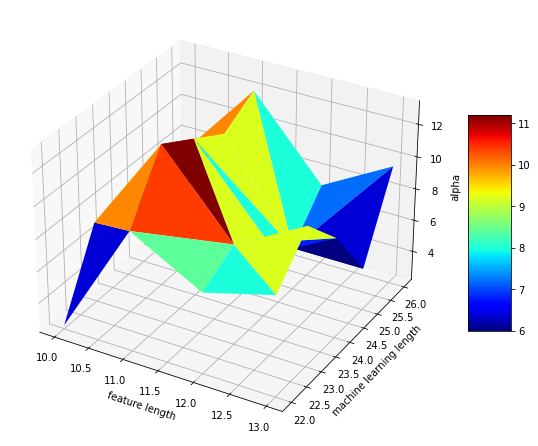

In [60]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

model = 'Ensemble'
df = alpha_ff5
xdata = []
ydata = []
zdata =[ ]

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)


for ix, row in df.iterrows():
    name = ix.split('_')
    ml_lookback = float(name[-1])
    feature_lookback = float(name[-2])
    
    xdata.append(ml_lookback)
    ydata.append(feature_lookback)
    zdata.append(float(str(row[model]).replace('*',''))*12.0*100.0)

surf = ax.plot_trisurf(xdata, ydata, zdata, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('feature length')
ax.set_ylabel('machine learning length')
ax.set_zlabel('alpha')
plt.show()

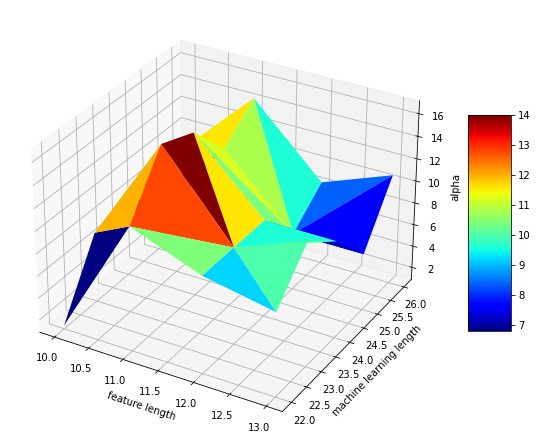

In [61]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

model = 'Ensemble'
df = alpha_ff5_scaled
xdata = []
ydata = []
zdata =[ ]

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)


for ix, row in df.iterrows():
    name = ix.split('_')
    ml_lookback = float(name[-1])
    feature_lookback = float(name[-2])
    
    xdata.append(ml_lookback)
    ydata.append(feature_lookback)
    zdata.append(float(str(row[model]).replace('*',''))*12.0*100.0)

surf = ax.plot_trisurf(xdata, ydata, zdata, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('feature length')
ax.set_ylabel('machine learning length')
ax.set_zlabel('alpha')
plt.show()